# Ultimate 25k+ Matches Football Database Data Analysis - Part 1: Initial Data Exploration and Feature Engineering

This notebook focuses on initial exploration of the dataset, including descriptive statistics, handling missing values, duplicates, outliers and correlated features. The output of this notebook will be a new table with relevant preprocessed data for further analysis.

## Objectives:
- Get initial information on the data;
- Find and handle missing values;
- Find and handle duplicate values;
- Discover and handle outliers;
- Explore correlations and handle highly correlated features;
- Generate a table with relevant preprocessed data for further analysis.

## Questions to explore:
- How much data is missing in each column? For which columns and at what periods of time the data is missing? 
- How many duplicate values do we have? What are the possible reasons for them being duplicate?
- Are there outliers? Are they in acceptable range for those features?
- What are the correlation scores for the features of interest? What are the top correlated features? 

# Dataset description

- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

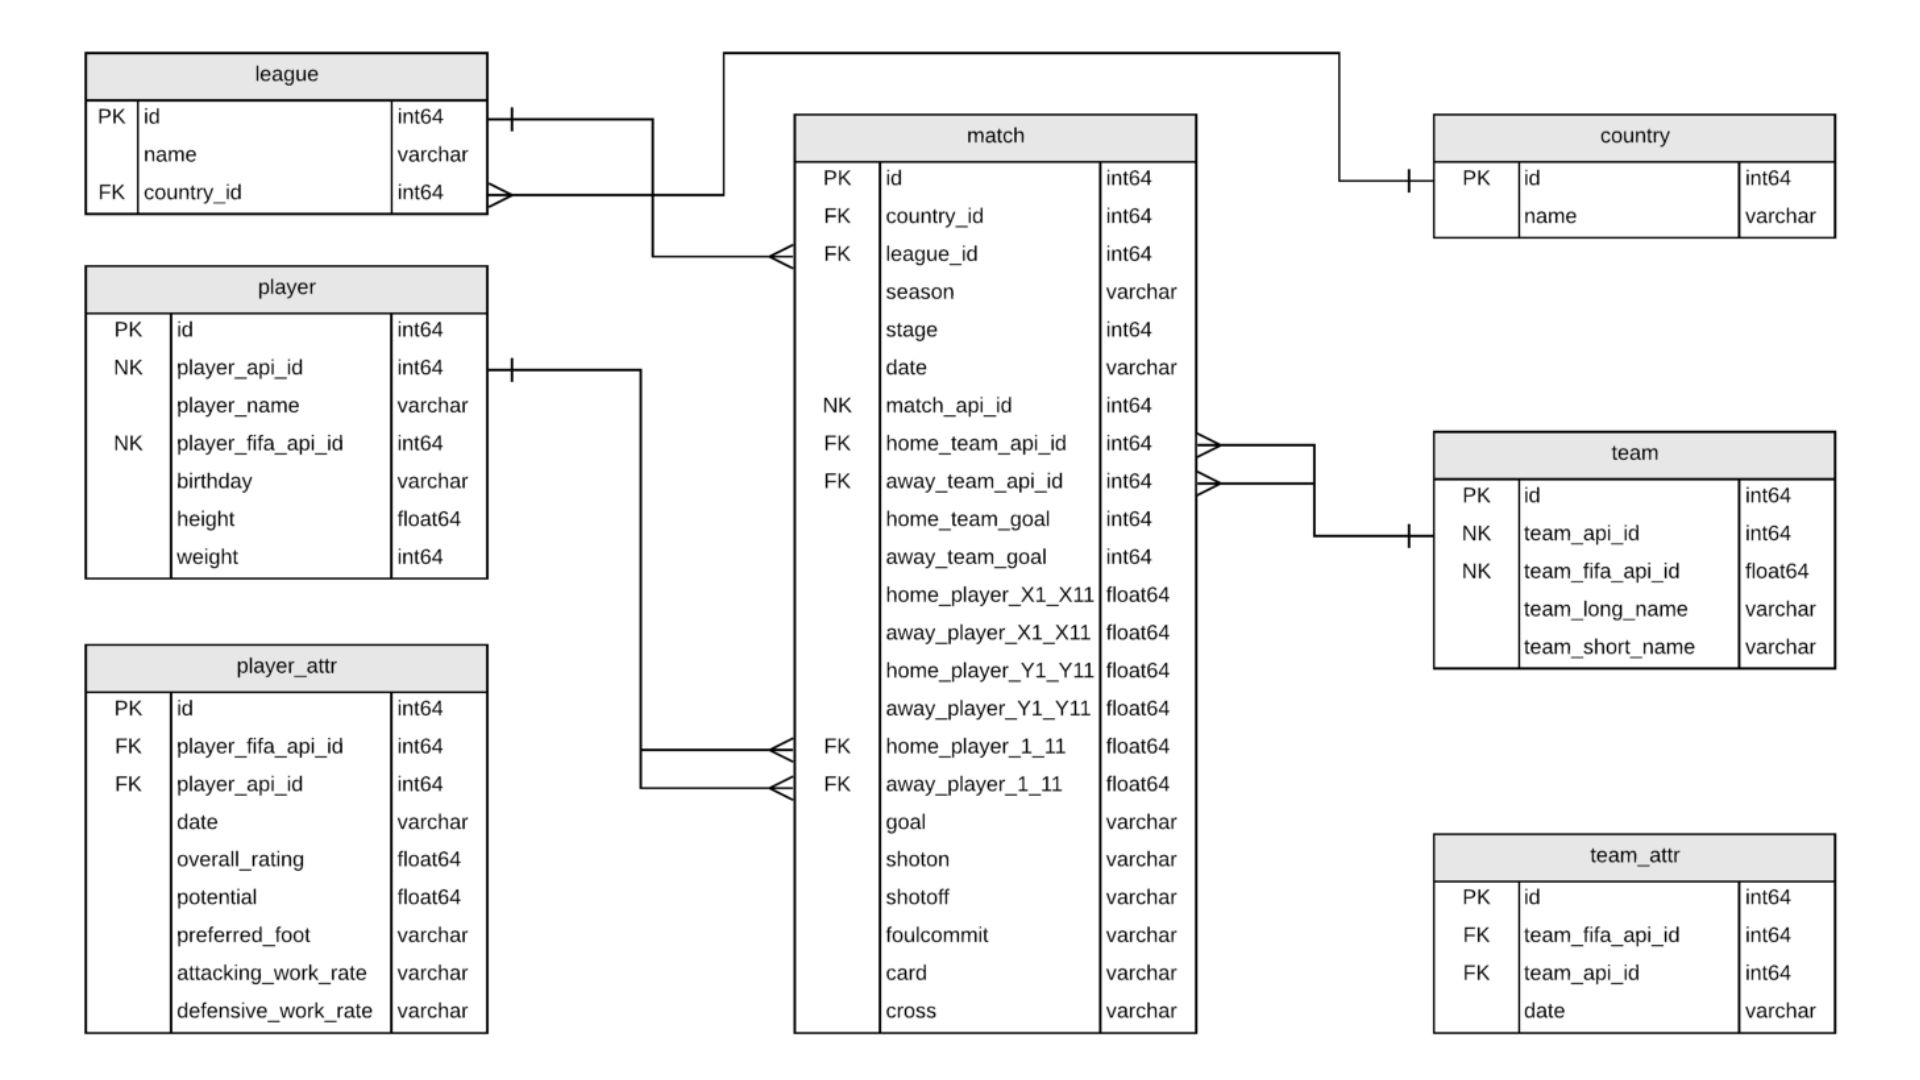

Note: This is a downsized version of a database relational schema, since some columns contain too many columns.

## Description of the tables:

1) **Match** - Each row represents a single match that was played. It contains:

- id (primary key): A unique number to identify each match
- league_id (foreign key referencing Leagues table): The league the match was played in (Premier League, La Liga, etc.)
- country_id - Which country the match took place in
- season - The season when the match happened (ex: 2022/2023). Column values range from 2008 to 2016.
- stage - The round or matchday within the league season. Each league season consists of a series of matchdays where all teams play one game. The values range from 1 to 38 matchdays (a typical Premier League season).
- date - The date the match was played. Column values have daily frequency. Minimum value is 2008-07-18, maximum is 2016-05-25.
- match_api_id - ID for the match from an API
- home_team_api_id - API ID for the home team
- away_team_api_id - API ID for the away team
- home_team_goal - Goals scored by the home team. Values range from 0 to 10 with step 1.
- away_team_goal - Goals scored by the away team. Values range from 0 to 9 with step 1.

Columns indicating player positions:

- home/away_player_X1 to X11 - The positions of the home and away team players
- home/away_player_Y1 to Y11 - The positions of the home and away team players

Columns with the jersey numbers of the starting 11 players:

- home/away_player_1 to 11 - ID numbers of the starting 11 home and away players

Columns with the additional match stats:

- goal - Total goals scored
- shoton - Total shots on goal
- shotoff - Total shots off goal
- foulcommit - Fouls committed
- card - Number of cards given out
- cross - Number of crosses
- corner - Number of corner kicks
- possession - Percentage of possession

Columns for betting odds from various providers(bookmakers):

- B365H, B365D, B365A - Bet365 odds for Home win, Draw, Away win
- BWH, BWD, BWA - Bet&Win odds
- IWH, IWD, IWA - Interwetten odds
- LBH, LBD, LBA - Ladbrokes odds
- PSH, PSD, PSA - Pinnacle Sports odds
- WHH, WHD, WHA - William Hill odds
- SJH, SJD, SJA - Stan James odds
- VCH, VCD, VCA - VC Bet odds
- GBH, GBD, GBA - Gamebookers odds
- BSH, BSD, BSA - Blue Square odds

**Additional info:**

A football league season consists of teams playing a series of matches against each other (usually 38 matches). These matches are grouped into "stages". Each stage represents a complete round of matches where every team plays once. For example:
- Stage 1 - All teams play their 1st match of the season

-----
2) **Team** - This table provides the mapping between the team ids used in different systems, along with the long and short names for each club/team. It allows linking team ids to the full name of the team.

- id - Unique number to identify each football club/team
- team_api_id - An id assigned to the team from an API
- team_fifa_api_id - The team id from the FIFA API
- team_long_name - The full official name of the football club
- team_short_name - Abbreviated name or common nickname for the club

-----
3) **League** - Each row represents a football league. It contains:

- id (primary key): A unique number to identify each league
- name: The name of the league (English Premier League, Spanish La Liga, etc.)
- country_id: The id of the country that this league belongs to

-----
4) **Country** - Unique id and name for each country included in the football dataset.
- id - A unique number to identify each country
- name - The name of the country

-----

5) **Player_Attributes** - This table contains detailed attributes for football players. Each row represents the stats for a player on a particular date.

- id (primary key) - Unique number for each player
- player_fifa_api_id - ID for the player from the FIFA API
- player_api_id - Another ID for the player from an API
- date - Date the stats are for
 
Columns representing different skill attributes for players:
- overall_rating - Overall skill level
- potential - Potential ability in the future
- preferred_foot - Left or right footed
- attacking_work_rate - How aggressively they move forward
- defensive_work_rate - How hard they work to get back on defense
- crossing - Accuracy of crossing passes
- finishing - Accuracy of shooting at goal
- heading_accuracy - Accuracy of heading shots
- short_passing - Short pass accuracy
- volleys - Kicking accuracy while the ball is in flight
- dribbling - Ball control while running
- curve - Ability to make curved shots
- free_kick_accuracy - Accuracy taking free kicks
- long_passing - Long pass accuracy
- ball_control - Ability controlling the ball
- acceleration - Acceleration speed
- sprint_speed - Top sprinting speed
- agility - Agility on the ball
- reactions - Reaction time
- balance - Balance on the ball
- shot_power - Power on kicks
- jumping - Vertical leaping ability
- stamina - Ability to keep playing without getting tired
- strength - Physical strength
- long_shots - Long distance shooting accuracy
- aggression - Aggressive tendency
- interceptions - Ability to intercept passes
- positioning - Ability to position oneself well on the field
- vision - Field awareness
- penalties - Penalty kick accuracy
- marking - Tight marking of opposition players
- standing_tackle - Ability to win balls while standing
- sliding_tackle - Ability to win balls while sliding
- gk_diving - Goalkeeper diving ability
- gk_handling - Goalkeeper ball handling
- gk_kicking - Goalkeeper kick accuracy
- gk_positioning - Goalkeeper positioning
- gk_reflexes - Goalkeeper reaction time

---

6) **Player** - basic personal information on the players.
- id (primary key) - Unique number to identify each player
- player_api_id - ID for player from another API
- player_name - Full name of the player
- player_fifa_api_id - ID for player from FIFA API
- birthday - Date of birth for the player
- height - Height of the player in cm
- weight - Weight of the player in pounds
---

7) **Team_Attributes** - gives detailed stats on how each team tends to play in attack and defense.
- id - Unique ID for each row
- team_fifa_api_id - The team's ID from the FIFA API
- team_api_id - The team's ID from another API
- date - Date the attributes are for

Columns that describe attributes for how the team plays:

- buildUpPlaySpeed - How fast they move the ball up the field
- buildUpPlayDribbling - Ability to dribble the ball up the field
- buildUpPlayPassing - Accuracy of their passing to move up the field
- buildUpPlayPositioningClass - Description of their positioning during build up
- chanceCreationPassing - Accuracy of passing to create chances
- chanceCreationCrossing - Quality of crosses to create chances
- chanceCreationShooting - Ability to shoot and create chances
- chanceCreationPositioningClass - Positioning to create chances
- defencePressure - How much they pressure opponents
- defenceAggression - Aggressiveness of their defending
- defenceTeamWidth - How compact or spread out they defend
- defenceDefenderLineClass - Description of their defensive line

The Class columns provide a rating in words (e.g. "Organised") for some of the numeric attributes.

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import textwrap
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import helper_functions as hf

import sqlite3 as sql

sns.set_style("darkgrid")
# warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [4]:
# connect to the database
conn = sql.connect("database.sqlite")

# create a cursor
c = conn.cursor()

<IPython.core.display.Javascript object>

# 1. Dataset exploration

In [5]:
tables = pd.read_sql(
    """
                    SELECT *
                    FROM sqlite_master
                    WHERE type = 'table';
                    """,
    conn, 
)
tables

type               name           tbl_name  rootpage  \
0   table    sqlite_sequence    sqlite_sequence         4   
1   table  Player_Attributes  Player_Attributes        11   
2   table             Player             Player        14   
3   table              Match              Match        18   
4   table             League             League        24   
5   table            Country            Country        26   
6   table               Team               Team        29   
7   table    Team_Attributes    Team_Attributes         2   
8   table         match_info         match_info    312374   
9   table        player_info        player_info    305672   
10  table          team_info          team_info    312161   

                                                  sql  
0              CREATE TABLE sqlite_sequence(name,seq)  
1   CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2   CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3   CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4   CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5   CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6   CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7   CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...  
8   CREATE TABLE "match_info" (\n"country_id" INTE...  
9   CREATE TABLE "player_info" (\n"season" TEXT,\n...  
10  CREATE TABLE "team_info" (\n"season" TEXT,\n  ...

<IPython.core.display.Javascript object>

## 1.1. sqlite_sequence table

The table sqlite_sequence contains information on the length of each table.

In [6]:
sqlite_sequence = pd.read_sql(
    """
            SELECT *
            FROM sqlite_sequence;
            """,
    conn,
)
sqlite_sequence

name     seq
0               Team  103916
1            Country   51958
2             League   51958
3              Match   51958
4             Player   11075
5  Player_Attributes  183978
6    Team_Attributes    1458

<IPython.core.display.Javascript object>

## 1.2. Player_Attributes table

In [7]:
player_attributes = pd.read_sql(
    """
            SELECT *
            FROM Player_Attributes
            WHERE date >= '2011-07-29 00:00:00';
            """,
    conn, index_col='id',
)
player_attributes

player_fifa_api_id  player_api_id                 date  \
id                                                               
1                   218353         505942  2016-02-18 00:00:00   
2                   218353         505942  2015-11-19 00:00:00   
3                   218353         505942  2015-09-21 00:00:00   
4                   218353         505942  2015-03-20 00:00:00   
6                   189615         155782  2016-04-21 00:00:00   
...                    ...            ...                  ...   
183949              164680         111182  2012-02-22 00:00:00   
183950              164680         111182  2011-08-30 00:00:00   
183969              102359          39902  2012-08-31 00:00:00   
183970              102359          39902  2012-02-22 00:00:00   
183971              102359          39902  2011-08-30 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
id                                                                     
1                 67.0       71.0          right              medium   
2                 67.0       71.0          right              medium   
3                 62.0       66.0          right              medium   
4                 61.0       65.0          right              medium   
6                 74.0       76.0           left                high   
...                ...        ...            ...                 ...   
183949            68.0       76.0           left              medium   
183950            68.0       76.0           left              medium   
183969            78.0       78.0          right              medium   
183970            81.0       81.0          right              medium   
183971            81.0       81.0          right              medium   

       defensive_work_rate  crossing  finishing  ...  vision  penalties  \
id                                               ...                      
1                   medium      49.0       44.0  ...    54.0       48.0   
2                   medium      49.0       44.0  ...    54.0       48.0   
3                   medium      49.0       44.0  ...    54.0       48.0   
4                   medium      48.0       43.0  ...    53.0       47.0   
6                   medium      80.0       53.0  ...    66.0       59.0   
...                    ...       ...        ...  ...     ...        ...   
183949              medium      73.0       48.0  ...    45.0       53.0   
183950              medium      73.0       48.0  ...    45.0       53.0   
183969                 low      77.0       70.0  ...    82.0       78.0   
183970                 low      80.0       72.0  ...    87.0       78.0   
183971                 low      80.0       72.0  ...    87.0       78.0   

        marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
id                                                                         
1          65.0             69.0            69.0        6.0         11.0   
2          65.0             69.0            69.0        6.0         11.0   
3          65.0             66.0            69.0        6.0         11.0   
4          62.0             63.0            66.0        5.0         10.0   
6          76.0             75.0            78.0       14.0          7.0   
...         ...              ...             ...        ...          ...   
183949     64.0             68.0            66.0        9.0          8.0   
183950     64.0             68.0            66.0        9.0          8.0   
183969     22.0             31.0            30.0        9.0         13.0   
183970     22.0             31.0            30.0        9.0         13.0   
183971     22.0             31.0            30.0        9.0         13.0   

        gk_kicking  gk_positioning  gk_reflexes  
id                                               
1             10.0             8.0          8.0  
2             10.0             8.0          8.0  
3             10.0             8.0          8.0

<IPython.core.display.Javascript object>

In [8]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136769 entries, 1 to 183971
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   136769 non-null  int64  
 1   player_api_id        136769 non-null  int64  
 2   date                 136769 non-null  object 
 3   overall_rating       136683 non-null  float64
 4   potential            136683 non-null  float64
 5   preferred_foot       136683 non-null  object 
 6   attacking_work_rate  136683 non-null  object 
 7   defensive_work_rate  136683 non-null  object 
 8   crossing             136683 non-null  float64
 9   finishing            136683 non-null  float64
 10  heading_accuracy     136683 non-null  float64
 11  short_passing        136683 non-null  float64
 12  volleys              136683 non-null  float64
 13  dribbling            136683 non-null  float64
 14  curve                136683 non-null  float64
 15  free_kick_accuracy   1

<IPython.core.display.Javascript object>

In [9]:
object_cols_pa = ['player_fifa_api_id', 'player_api_id']
player_attributes[object_cols_pa] = player_attributes[object_cols_pa].astype("object")
player_attributes.date = pd.to_datetime(player_attributes['date'])

<IPython.core.display.Javascript object>

In [10]:
player_attributes.describe().T 

count                           mean  \
date                  136769  2014-04-12 15:56:47.114185216   
overall_rating      136683.0                       69.17755   
potential           136683.0                       73.27394   
crossing            136683.0                      55.842504   
finishing           136683.0                      50.454929   
heading_accuracy    136683.0                      57.572705   
short_passing       136683.0                      63.352999   
volleys             136683.0                      49.802967   
dribbling           136683.0                      60.364574   
curve               136683.0                      53.829196   
free_kick_accuracy  136683.0                      49.894442   
long_passing        136683.0                      57.539753   
ball_control        136683.0                      64.302122   
acceleration        136683.0                      67.764294   
sprint_speed        136683.0                      68.108097   
agility             136683.0                       66.34054   
reactions           136683.0                      66.671137   
balance             136683.0                      64.832159   
shot_power          136683.0                      62.925514   
jumping             136683.0                      67.136023   
stamina             136683.0                      67.163978   
strength            136683.0                      67.923546   
long_shots          136683.0                      54.251472   
aggression          136683.0                       61.34689   
interceptions       136683.0                      50.851979   
positioning         136683.0                      55.387963   
vision              136683.0                      57.213692   
penalties           136683.0                      54.554517   
marking             136683.0                      46.939239   
standing_tackle     136683.0                      50.840858   
sliding_tackle      136683.0                      48.299386   
gk_diving           136683.0                      14.686398   
gk_handling         136683.0                      14.400138   
gk_kicking          136683.0                      14.257589   
gk_positioning      136683.0                      14.481977   
gk_reflexes         136683.0                      14.766452   

                                    min                  25%  \
date                2011-08-30 00:00:00  2013-04-19 00:00:00   
overall_rating                     40.0                 65.0   
potential                          45.0                 69.0   
crossing                            6.0                 46.0   
finishing                           3.0                 35.0   
heading_accuracy                    1.0                 50.0   
short_passing                       3.0                 59.0   
volleys                             2.0                 36.0   
dribbling                           5.0                 54.0   
curve                               2.0                 42.0   
free_kick_accuracy                  4.0                 37.0   
long_passing                        7.0                 50.0   
ball_control                        9.0                 60.0   
acceleration                       13.0                 61.0   
sprint_speed                       12.0                 62.0   
agility                            11.0                 58.0   
reactions                          20.0                 61.0   
balance                            12.0                 57.0   
shot_power                          3.0                 56.0   
jumping                            14.0                 60.0   
stamina                            10.0                 61.0   
strength                           12.0                 61.0   
long_shots                          2.0                 42.0   
aggression                          8.0                 52.0   
interceptions                       2.0                 31.0   
positioning                

<IPython.core.display.Javascript object>

### 1.2.1. Missing values

There is 1% or less of data missing in the player_attributes table. 

<Axes: >

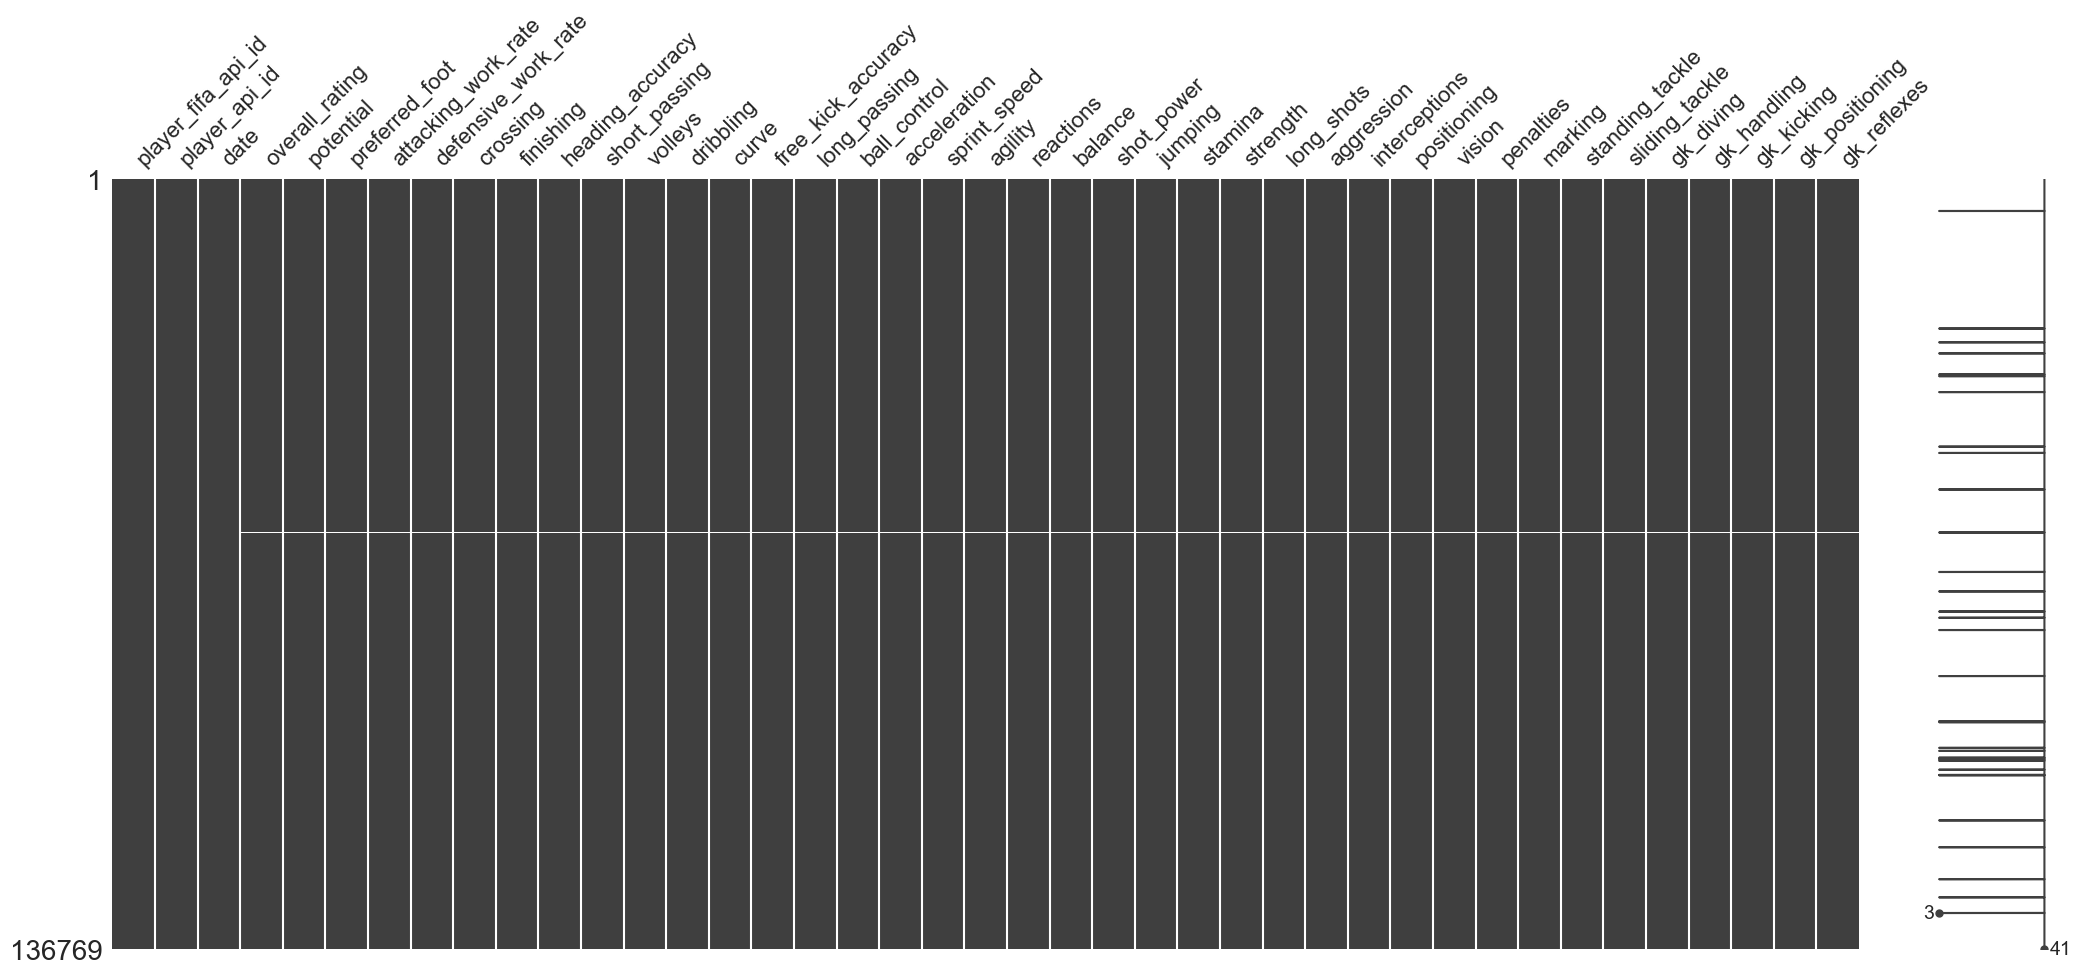

<IPython.core.display.Javascript object>

In [11]:
# matrix showing the location of missing values
msno.matrix(player_attributes)

In [12]:
player_attributes.isna().sum().sort_values(ascending=False)

agility                86
reactions              86
shot_power             86
jumping                86
stamina                86
strength               86
long_shots             86
aggression             86
interceptions          86
positioning            86
vision                 86
penalties              86
marking                86
standing_tackle        86
sliding_tackle         86
gk_diving              86
gk_handling            86
gk_kicking             86
gk_positioning         86
balance                86
gk_reflexes            86
heading_accuracy       86
sprint_speed           86
potential              86
preferred_foot         86
attacking_work_rate    86
defensive_work_rate    86
crossing               86
finishing              86
short_passing          86
volleys                86
dribbling              86
curve                  86
free_kick_accuracy     86
long_passing           86
ball_control           86
acceleration           86
overall_rating         86
date        

<IPython.core.display.Javascript object>

In [13]:
# proportion of missing values
player_attributes.isna().sum() / len(player_attributes.index)

player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.000629
potential              0.000629
preferred_foot         0.000629
attacking_work_rate    0.000629
defensive_work_rate    0.000629
crossing               0.000629
finishing              0.000629
heading_accuracy       0.000629
short_passing          0.000629
volleys                0.000629
dribbling              0.000629
curve                  0.000629
free_kick_accuracy     0.000629
long_passing           0.000629
ball_control           0.000629
acceleration           0.000629
sprint_speed           0.000629
agility                0.000629
reactions              0.000629
balance                0.000629
shot_power             0.000629
jumping                0.000629
stamina                0.000629
strength               0.000629
long_shots             0.000629
aggression             0.000629
interceptions          0.000629
positioning            0.000629
vision  

<IPython.core.display.Javascript object>

In [14]:
player_attributes.dropna(inplace=True)

<IPython.core.display.Javascript object>

### 1.2.2. Duplicate values

There are no duplicate rows or columns.

In [15]:
len(player_attributes) - len(player_attributes.drop_duplicates())  # count duplicate values

0

<IPython.core.display.Javascript object>

In [16]:
player_attributes[player_attributes.duplicated()]  # get duplicated rows

Empty DataFrame
Columns: [player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]
Index: []

[0 rows x 41 columns]

<IPython.core.display.Javascript object>

In [17]:
len(player_attributes.columns.tolist()) == len(
    set(player_attributes.columns.tolist())
)  # see if there are duplicate columns

True

<IPython.core.display.Javascript object>

In [18]:
player_attributes.drop_duplicates(keep="first", inplace=True)

<IPython.core.display.Javascript object>

### 1.2.3. Handling outliers

In [19]:
# get a list of numeric columns
num_cols_pa = player_attributes.select_dtypes(exclude=["object", "datetime64[ns]"]).columns.tolist()
pa_numeric = player_attributes[num_cols_pa]

<IPython.core.display.Javascript object>

<Axes: >

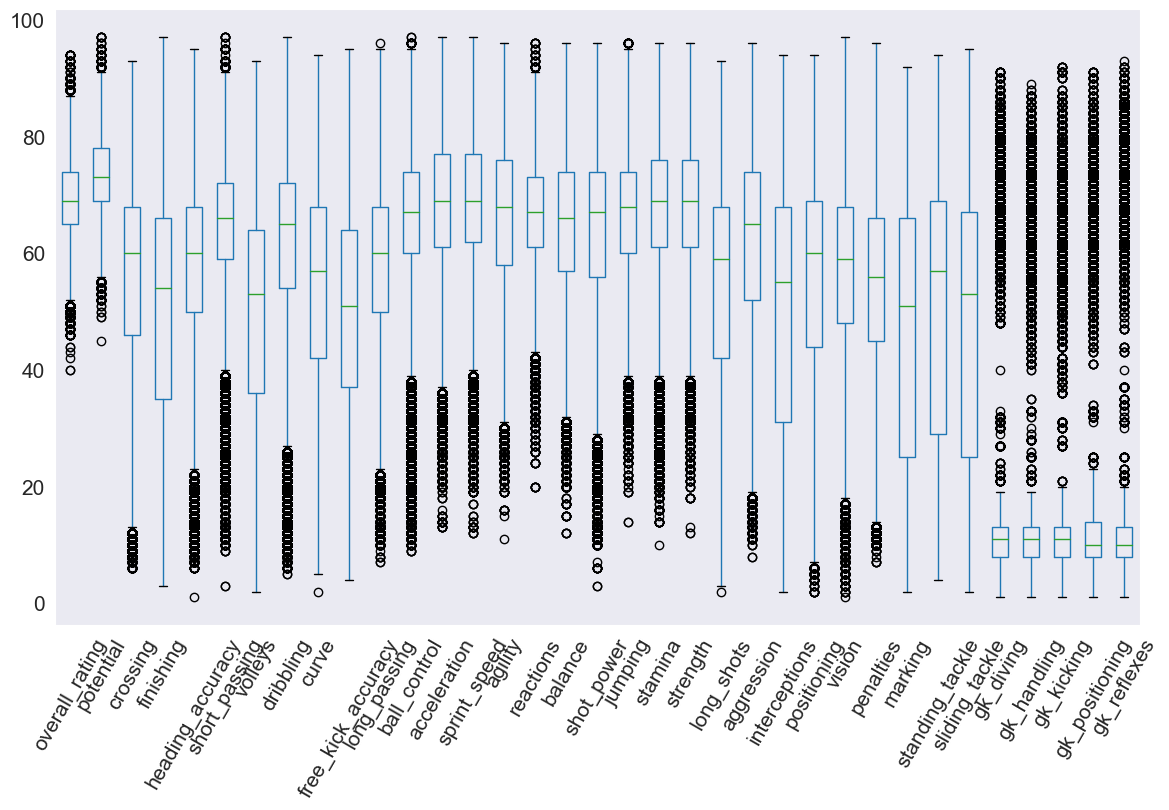

<IPython.core.display.Javascript object>

In [20]:
pa_numeric.boxplot(grid=False, rot=60, fontsize=15, figsize=(14, 8))

These attributes are on a 0-100 scale based on the FIFA video game ratings. All the outliers are in acceptable ranges, so we will keep them for further analysis.

### 1.2.4. Categorical features

In [21]:
cat_cols_pa = player_attributes.select_dtypes(include=['object', 'category']).columns
pa_cat = player_attributes[cat_cols_pa]

<IPython.core.display.Javascript object>

In [22]:
for col in pa_cat:
    print(f"Unique values for {col}:")
    print(pa_cat[col].unique())
    print("-"*20)

Unique values for player_fifa_api_id:
[218353 189615 186170 ... 2488 164680 102359]
--------------------
Unique values for player_api_id:
[505942 155782 162549 ... 26357 111182 39902]
--------------------
Unique values for preferred_foot:
['right' 'left']
--------------------
Unique values for attacking_work_rate:
['medium' 'high' 'low' 'None']
--------------------
Unique values for defensive_work_rate:
['medium' 'high' 'low' '5' '1' '8' '4' '0' '2' '3' '6' '7' '9']
--------------------


<IPython.core.display.Javascript object>

In [23]:
mapping = {
    '1': 'low', 
    '2': 'low',
    '3': 'low', 
    '4': 'medium',
    '5': 'medium',
    '6': 'medium',
    '7': 'high',
    '8': 'high',
    '9': 'high',
    '0': np.nan,
    'ean': np.nan,
    'o': np.nan,
    'ormal': np.nan,
    'tocky': np.nan,
    'es': np.nan,
    'None': np.nan,
    'le': np.nan,
    'norm': np.nan, 
    'stoc': np.nan, 
    'y': np.nan
}

player_attributes_upd = player_attributes.copy(deep=True)
player_attributes_upd['defensive_work_rate'] = player_attributes_upd['defensive_work_rate'].replace(mapping)
player_attributes_upd['attacking_work_rate'] = player_attributes_upd['attacking_work_rate'].replace(mapping)

<IPython.core.display.Javascript object>

In [24]:
player_attributes_upd.dropna(inplace=True)

<IPython.core.display.Javascript object>

### 1.2.5. Distribution of values

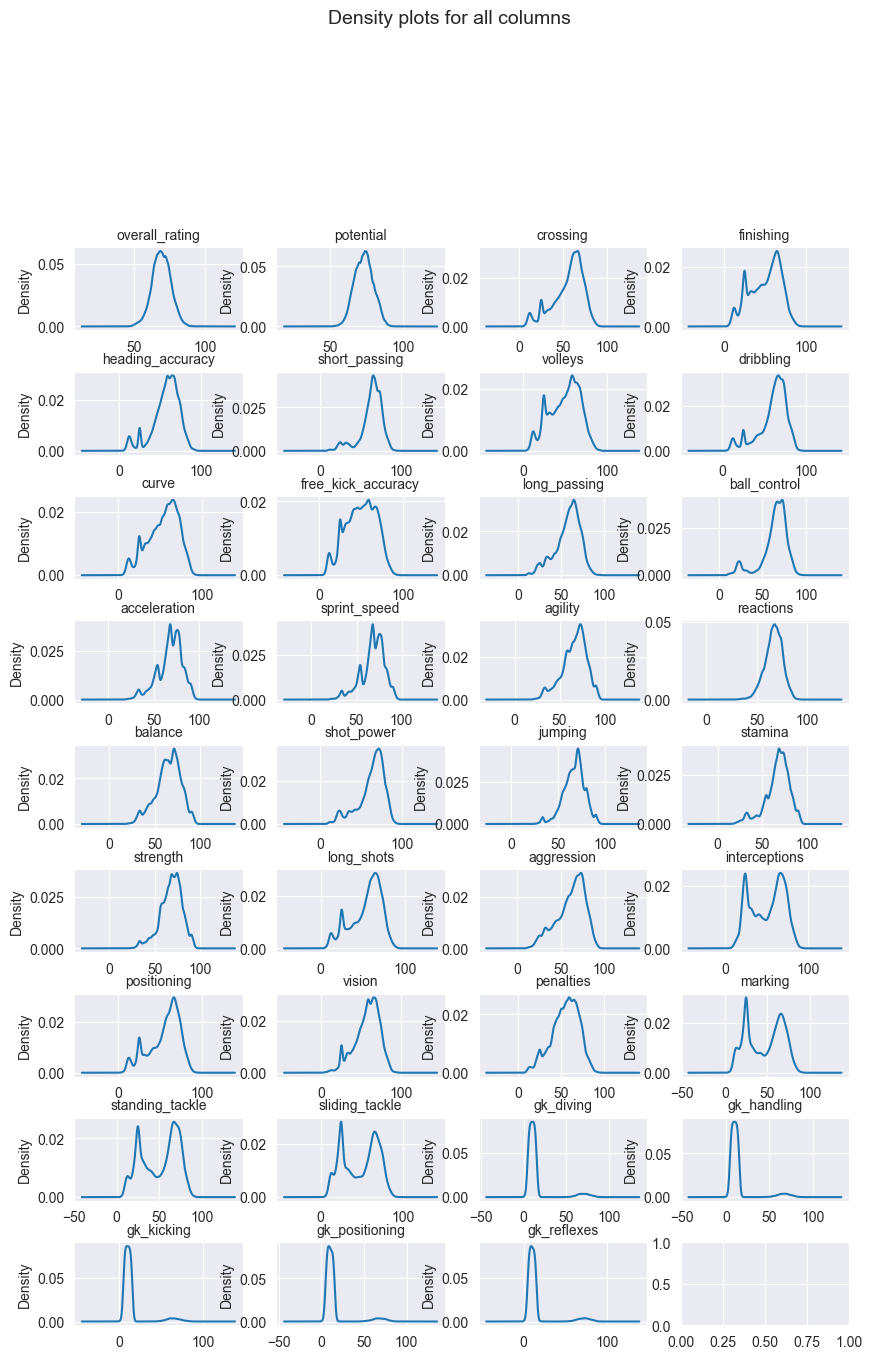

<IPython.core.display.Javascript object>

In [25]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(10, 14))
fig.subplots_adjust(hspace=0.5) 

for col, ax in zip(pa_numeric.columns, axes.flatten()):
    pa_numeric[col].plot(kind="density", ax=ax)
    ax.set_title(
        col, fontsize=10
    )  
    ax.set_xlabel("")  

fig.suptitle("Density plots for all columns", fontsize=14, y=1.05)

plt.show()

We can observe different types of distributions across columns. Some of the features have similar distributions, they could be correlated with each other and with some other features in the dataset. We will explore this further.

Now, let's see the countplots for categorical values:

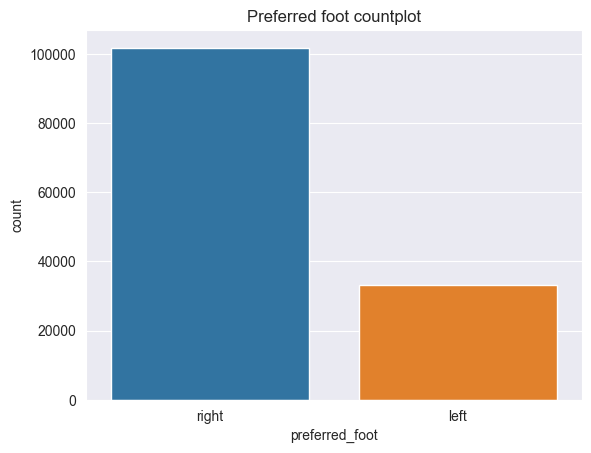

<IPython.core.display.Javascript object>

In [26]:
sns.countplot(
    x=player_attributes_upd['preferred_foot']
)
plt.title("Preferred foot countplot")
plt.show()

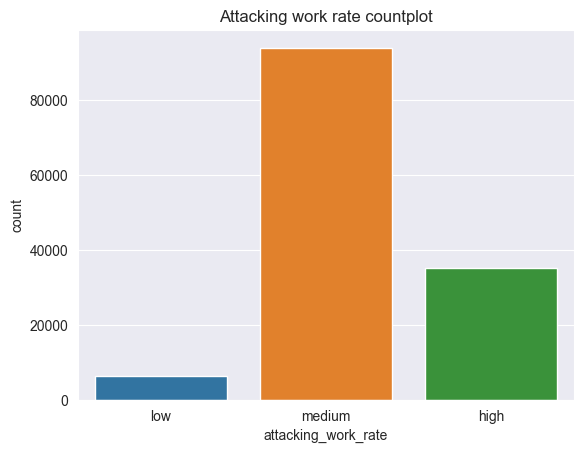

<IPython.core.display.Javascript object>

In [27]:
sns.countplot(
    x=player_attributes_upd['attacking_work_rate'],
    order=["low", "medium", "high"],
)
plt.title("Attacking work rate countplot")
plt.show()

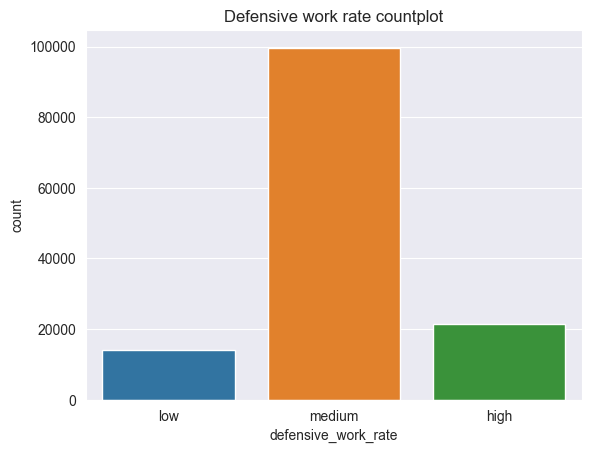

<IPython.core.display.Javascript object>

In [28]:
sns.countplot(
    x=player_attributes_upd['defensive_work_rate'],
    order=["low", "medium", "high"],
)
plt.title("Defensive work rate countplot")
plt.show()

- Most players in the dataset prefer to use right foot. 
- The most common attacking and defensive work rate is medium. 
- Attacking and defensive work rates appear similar to each other in the count distribution.

### 1.2.6. Correlations

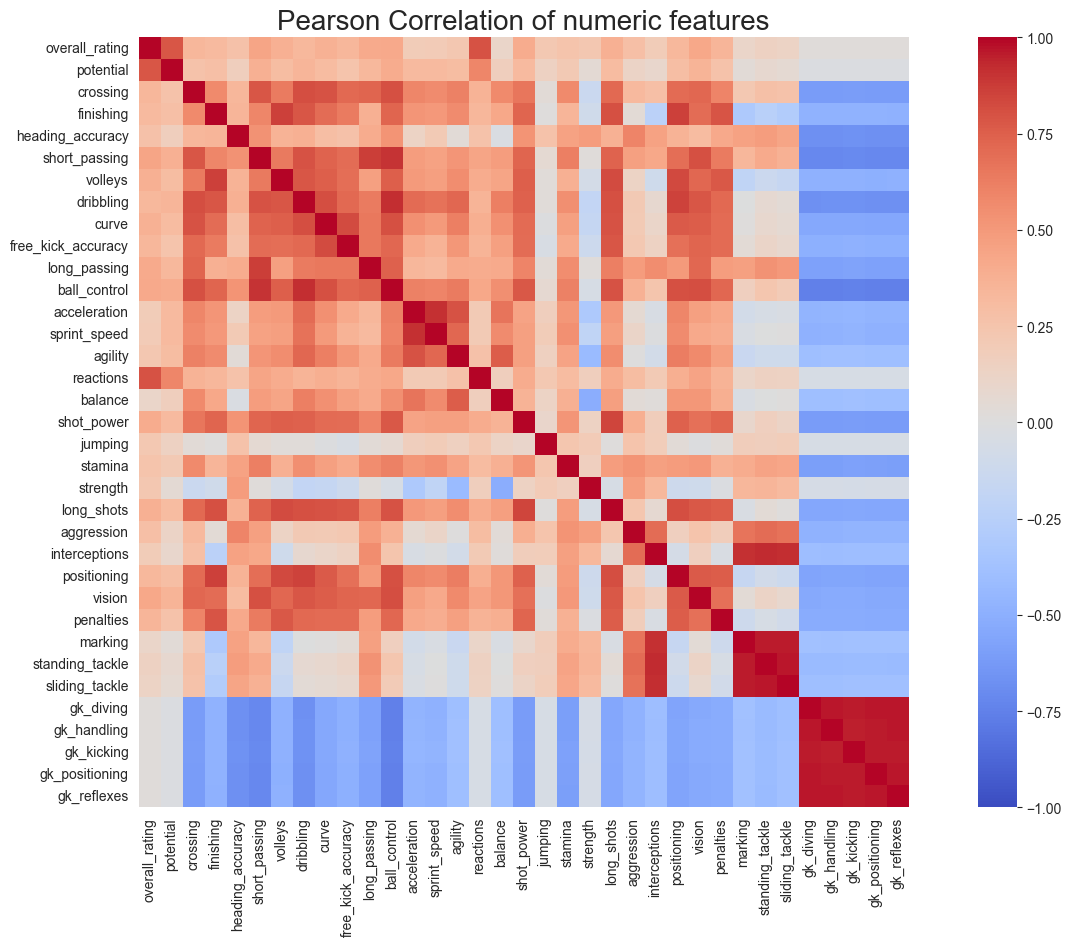

<IPython.core.display.Javascript object>

In [29]:
# Plot correlations with annotations
plt.figure(figsize=(18, 10))
plt.title("Pearson Correlation of numeric features", fontsize=20)
ax = sns.heatmap(player_attributes_upd.corr(numeric_only=True), cmap="coolwarm", 
                 vmin=-1, vmax=1, square=True)

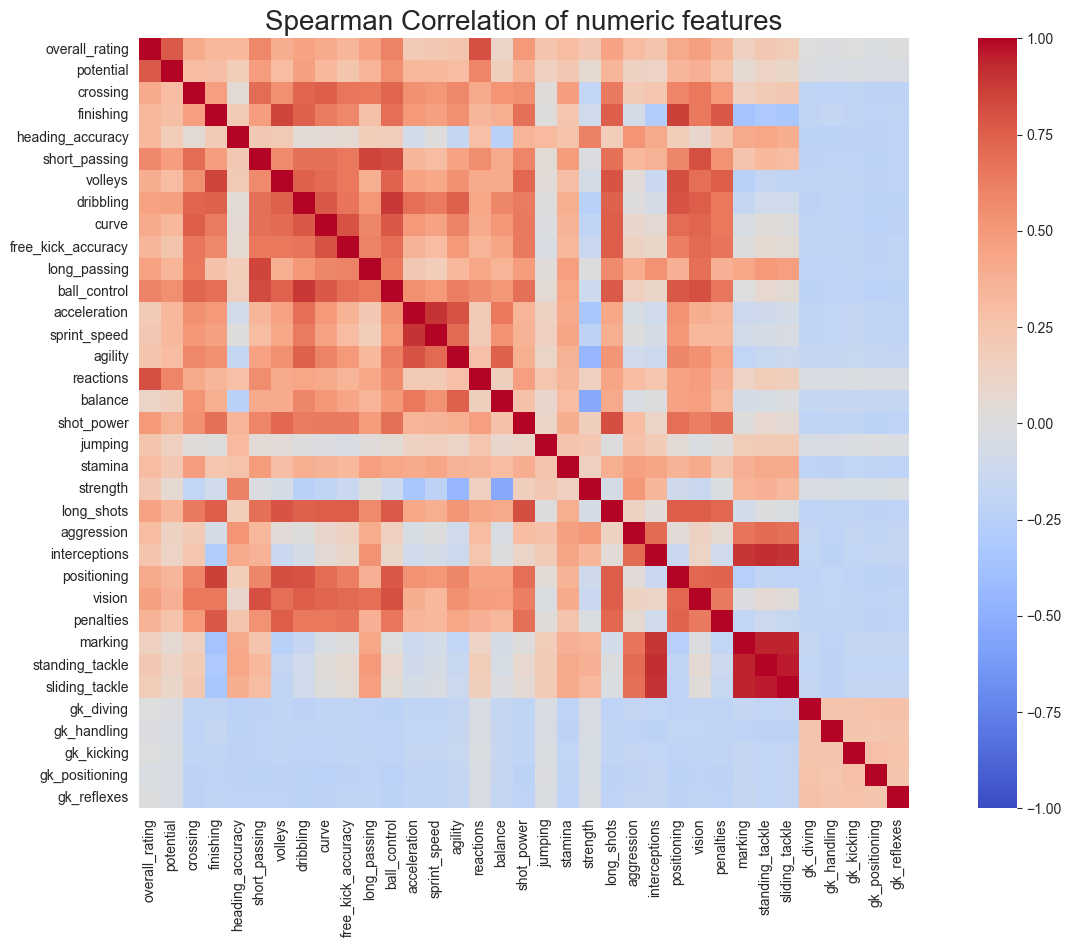

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(18, 10))
plt.title("Spearman Correlation of numeric features", fontsize=20)
ax = sns.heatmap(player_attributes_upd.corr(numeric_only=True, method='spearman'), cmap="coolwarm", 
                 vmin=-1, vmax=1, square=True)

The Spearman and Pearson correlation scores are similar, but since Pearson correlation is sensitive to outliers and the data has many outliers (especially for the goalkeeper(gk) features where we can see the biggest difference in correlation measurements), we will go on with the Spearman scores in our further analysis.

In [31]:
heatmap_data_pa = hf.get_strong_corr_features(player_attributes_upd, method="spearman", threshold=0.3)
correlation_matrix_pa = heatmap_data_pa.pivot(
    index=["var_1"], columns=["var_2"], values="corr"
)

<IPython.core.display.Javascript object>

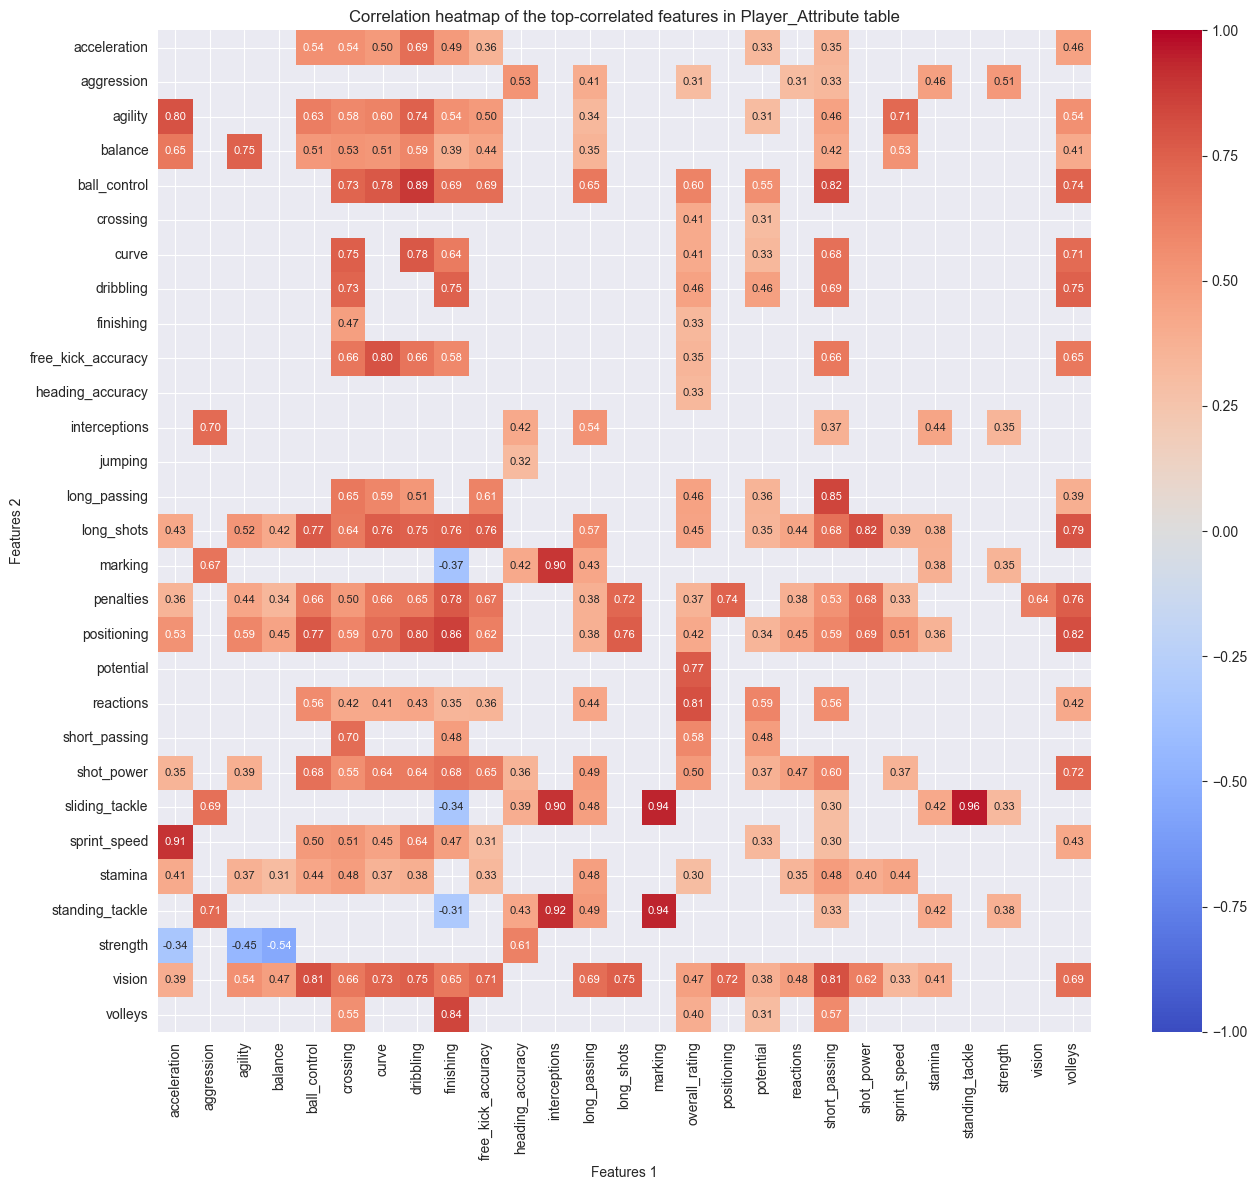

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix_pa, annot=True, cmap="coolwarm", square=True, center=0, fmt=".2f", annot_kws={"size": 8},
    vmin=-1, vmax=1,
)

# Set the title and adjust the layout
plt.title("Correlation heatmap of the top-correlated features in Player_Attribute table")
plt.xlabel("Features 1")  # Set the x-axis title
plt.ylabel("Features 2")  # Set the y-axis title

plt.tight_layout()

plt.show()

- There are many significantly correlated features in the Player_Attribute table, thus we will perform feature reduction based on the correlation scores.

Let's also see what features are correlated the most with the column "overall_rating":

In [33]:
heatmap_data_pa[(heatmap_data_pa['var_2'] == 'overall_rating')].sort_values(by='corr', ascending=False)

var_1           var_2      corr
16            reactions  overall_rating  0.807277
25            potential  overall_rating  0.770728
94         ball_control  overall_rating  0.604665
105       short_passing  overall_rating  0.579175
135          shot_power  overall_rating  0.495304
150              vision  overall_rating  0.466510
154        long_passing  overall_rating  0.458771
155           dribbling  overall_rating  0.458444
159          long_shots  overall_rating  0.446738
179         positioning  overall_rating  0.415695
184               curve  overall_rating  0.411547
185            crossing  overall_rating  0.410339
190             volleys  overall_rating  0.395972
210           penalties  overall_rating  0.365355
224  free_kick_accuracy  overall_rating  0.347241
230           finishing  overall_rating  0.334045
231    heading_accuracy  overall_rating  0.332547
242          aggression  overall_rating  0.311162
250             stamina  overall_rating  0.301351

<IPython.core.display.Javascript object>

We can see some strong to moderate correlation between the overall rating and other 20 features. The strongest correlations are with:
- reactions
- potential
- ball control

These features seem to have the highest effect on the overall rating of a player.

### 1.2.7. Feature reduction for top-correlated features

Among the highest correlated features (with absolute correlation score more than 0.7), let's combine the ones that are connected based on football expertise.

Additional resources used:
https://fifauteam.com/fifa-20-attributes-guide/

In [34]:
player_attributes_reduced = player_attributes_upd.copy()

<IPython.core.display.Javascript object>

In [35]:
strongest_corr_pa = heatmap_data_pa[(heatmap_data_pa['corr'] < -0.7) | (heatmap_data_pa['corr'] > 0.7)]

<IPython.core.display.Javascript object>

In [36]:
pass_cols = ['short_passing', 'long_passing', 'crossing', 'curve']
shoot_cols = ['finishing', 'shot_power', 'long_shots']
defend_cols = ['marking', 'standing_tackle', 'sliding_tackle'] 
dribble_cols = ['dribbling', 'agility', 'ball_control']
set_cols = ['free_kick_accuracy', 'penalties']
gk_cols = ['gk_reflexes', 'gk_positioning', 'gk_kicking', 'gk_handling']

player_attributes_reduced['passing'] = player_attributes_reduced[pass_cols].mean(axis=1)
player_attributes_reduced['shooting'] = player_attributes_reduced[shoot_cols].mean(axis=1)
player_attributes_reduced['defending'] = player_attributes_reduced[defend_cols].mean(axis=1)
player_attributes_reduced['dribbling'] = player_attributes_reduced[dribble_cols].mean(axis=1)
player_attributes_reduced['set_pieces'] = player_attributes_reduced[set_cols].mean(axis=1)
player_attributes_reduced['goalkeeping'] = player_attributes_reduced[gk_cols].mean(axis=1)

dropped_cols = pass_cols + shoot_cols + defend_cols + dribble_cols + set_cols + gk_cols
player_attributes_reduced.drop(columns=dropped_cols, inplace=True)

<IPython.core.display.Javascript object>

After combining relevant correlated features based on football expertise, we will drop some of the top correlated features (with a Spearman correlation score higher than 0.7)

In [37]:
corr_pa_reduced = hf.get_strong_corr_features(player_attributes_reduced, method="spearman", threshold=0.7)

<IPython.core.display.Javascript object>

In [38]:
corr_pa_reduced

var_1           var_2      corr
0       defending   interceptions  0.920226
1    sprint_speed    acceleration  0.905005
2        shooting         volleys  0.869076
3        shooting     positioning  0.857247
4     positioning         volleys  0.819369
5      set_pieces        shooting  0.816285
6         passing          vision  0.810605
7       reactions  overall_rating  0.807277
8       potential  overall_rating  0.770728
9      set_pieces         volleys  0.764384
10     set_pieces         passing  0.749449
11     set_pieces          vision  0.740042
12       shooting          vision  0.734889
13     set_pieces     positioning  0.729642
14         vision     positioning  0.724893
15  interceptions      aggression  0.704889
16      defending      aggression  0.700101

<IPython.core.display.Javascript object>

In [39]:
reduce_cols = ['acceleration', 'volleys', 'interceptions', 'positioning',
               'set_pieces', 'reactions', 'vision', 'potential', 'aggression']
player_attributes_reduced.drop(columns=reduce_cols, inplace=True)

<IPython.core.display.Javascript object>

In [40]:
player_attributes_reduced

player_fifa_api_id player_api_id       date  overall_rating  \
id                                                                   
1                  218353        505942 2016-02-18            67.0   
2                  218353        505942 2015-11-19            67.0   
3                  218353        505942 2015-09-21            62.0   
4                  218353        505942 2015-03-20            61.0   
6                  189615        155782 2016-04-21            74.0   
...                   ...           ...        ...             ...   
183949             164680        111182 2012-02-22            68.0   
183950             164680        111182 2011-08-30            68.0   
183969             102359         39902 2012-08-31            78.0   
183970             102359         39902 2012-02-22            81.0   
183971             102359         39902 2011-08-30            81.0   

       preferred_foot attacking_work_rate defensive_work_rate  \
id                                                              
1               right              medium              medium   
2               right              medium              medium   
3               right              medium              medium   
4               right              medium              medium   
6                left                high              medium   
...               ...                 ...                 ...   
183949           left              medium              medium   
183950           left              medium              medium   
183969          right              medium                 low   
183970          right              medium                 low   
183971          right              medium                 low   

        heading_accuracy  sprint_speed  balance  jumping  stamina  strength  \
id                                                                            
1                   71.0          64.0     65.0     58.0     54.0      76.0   
2                   71.0          64.0     65.0     58.0     54.0      76.0   
3                   71.0          64.0     65.0     58.0     54.0      76.0   
4                   70.0          64.0     65.0     58.0     54.0      76.0   
6                   58.0          78.0     90.0     85.0     79.0      56.0   
...                  ...           ...      ...      ...      ...       ...   
183949              62.0          72.0     58.0     69.0     80.0      73.0   
183950              62.0          72.0     58.0     68.0     80.0      73.0   
183969              59.0          63.0     70.0     58.0     50.0      62.0   
183970              59.0          63.0     70.0     58.0     50.0      62.0   
183971              59.0          63.0     70.0     58.0     50.0      62.0   

        gk_diving  passing   shooting  defending  goalkeeping  
id                                                             
1             6.0    54.75  44.666667  67.666667         9.25  
2             6.0    54.75  44.666667  67.666667         9.25  
3             6.0    54.75  44.666667  66.666667         9.25  
4             5.0    53.75  43.666667  63.666667         8.25  
6            14.0    72.25  62.000000  76.333333         9.25  
...           ...      ...        ...        ...          ...  
183949        9.0    67.25  44.666667  66.000000         6.50  
183950        9.0    67.25  44.666667  66.000000         6.50  
183969        9.0    80.50  75.000000  27.666667        10.25  
183970        9.0    83.25  77.000000  27.666667        10.25  
183971        9.0    83.25  77.000000  27.666667        10.25  

[135234 rows x 18 columns]

<IPython.core.display.Javascript object>

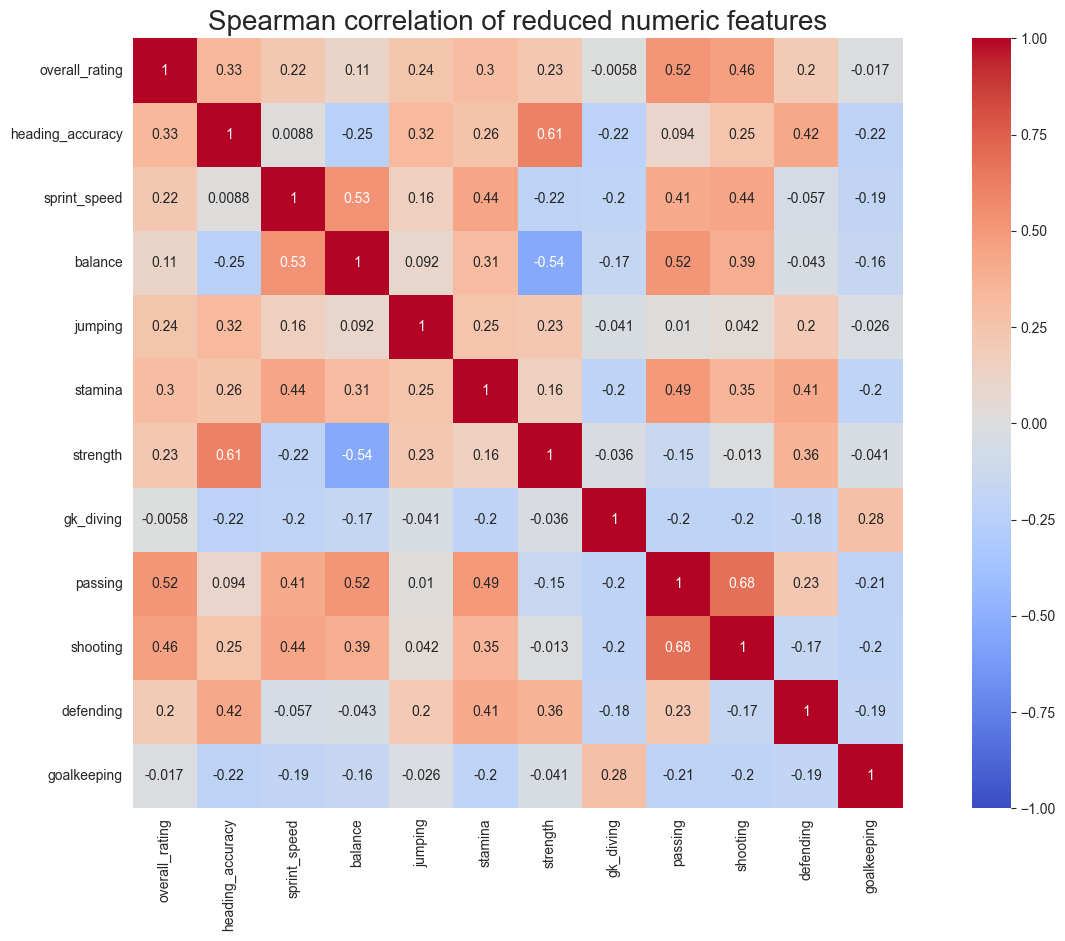

<IPython.core.display.Javascript object>

In [1045]:
plt.figure(figsize=(18, 10))
plt.title("Spearman correlation of reduced numeric features", fontsize=20)
ax = sns.heatmap(player_attributes_reduced.corr(numeric_only=True, method='spearman'), cmap="coolwarm", 
                 vmin=-1, vmax=1, square=True, annot=True)

After handling highly correlated features, we are left with 18 (including two id columns) columns as opposed to 41 in the original dataset.

## 1.3. Player table

In [798]:
player = pd.read_sql(
    """
            SELECT *, SUBSTR(birthday, 1, 4) AS year
            FROM Player;
            """,
    conn, index_col='id',
)
player

player_api_id          player_name  player_fifa_api_id  \
id                                                              
1             505942   Aaron Appindangoye              218353   
2             155782      Aaron Cresswell              189615   
3             162549          Aaron Doran              186170   
4              30572        Aaron Galindo              140161   
5              23780         Aaron Hughes               17725   
...              ...                  ...                 ...   
11071          26357       Zoumana Camara                2488   
11072         111182         Zsolt Laczko              164680   
11073          36491            Zsolt Low              111191   
11074          35506  Zurab Khizanishvili               47058   
11075          39902   Zvjezdan Misimovic              102359   

                  birthday  height  weight  year  
id                                                
1      1992-02-29 00:00:00  182.88     187  1992  
2      1989-12-15 00:00:00  170.18     146  1989  
3      1991-05-13 00:00:00  170.18     163  1991  
4      1982-05-08 00:00:00  182.88     198  1982  
5      1979-11-08 00:00:00  182.88     154  1979  
...                    ...     ...     ...   ...  
11071  1979-04-03 00:00:00  182.88     168  1979  
11072  1986-12-18 00:00:00  182.88     176  1986  
11073  1979-04-29 00:00:00  180.34     154  1979  
11074  1981-10-06 00:00:00  185.42     172  1981  
11075  1982-06-05 00:00:00  180.34     176  1982  

[11060 rows x 7 columns]

<IPython.core.display.Javascript object>

In [799]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11060 entries, 1 to 11075
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_name         11060 non-null  object 
 2   player_fifa_api_id  11060 non-null  int64  
 3   birthday            11060 non-null  object 
 4   height              11060 non-null  float64
 5   weight              11060 non-null  int64  
 6   year                11060 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 691.2+ KB


<IPython.core.display.Javascript object>

In [800]:
object_cols_pa = ['player_fifa_api_id', 'player_api_id']
player[object_cols_pa] = player[object_cols_pa].astype("object")
player.year = player.year.astype("int")
player.birthday = pd.to_datetime(player['birthday'])

lbs_to_kg = 0.453592
player['weight_kg'] = player['weight'] * lbs_to_kg
player['weight_kg'] = player['weight_kg'].round(2)
player.drop(columns=['weight'], inplace=True)

<IPython.core.display.Javascript object>

In [802]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

<IPython.core.display.Javascript object>

In [803]:
player.player_name = player.player_name.apply(clean_text)

<IPython.core.display.Javascript object>

In [805]:
player.describe().T

count                           mean                  min  \
birthday     11060  1987-02-03 21:19:20.072332800  1967-01-23 00:00:00   
height     11060.0                     181.867445               157.48   
year       11060.0                    1986.642857               1967.0   
weight_kg  11060.0                      76.375393                53.07   

                           25%                  50%                  75%  \
birthday   1983-03-17 00:00:00  1987-07-08 00:00:00  1991-04-12 00:00:00   
height                   177.8               182.88               185.42   
year                    1983.0               1987.0               1991.0   
weight_kg                72.12                 76.2                81.19   

                           max       std  
birthday   1999-04-24 00:00:00       NaN  
height                  208.28  6.369201  
year                    1999.0  5.481362  
weight_kg               110.22  6.799564

<IPython.core.display.Javascript object>

### 1.3.1. Missing values

There are no missing values in this table.

<Axes: >

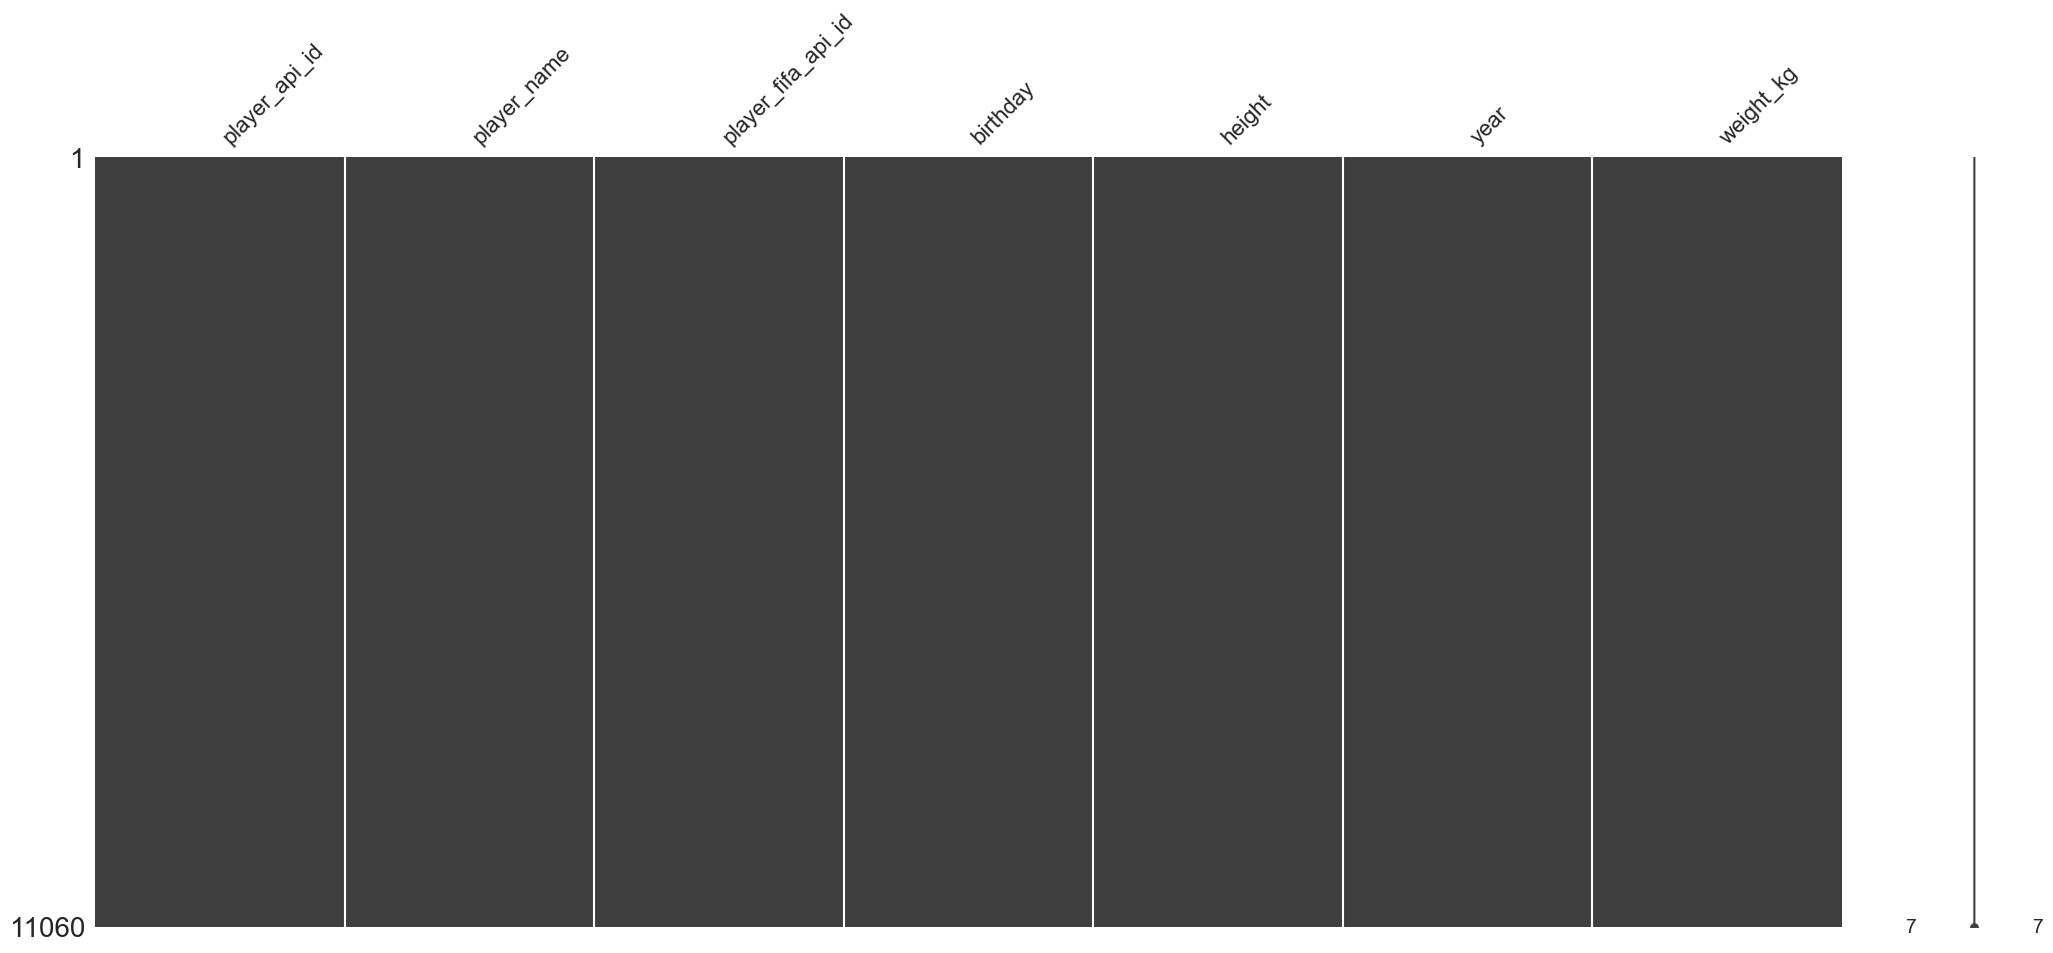

<IPython.core.display.Javascript object>

In [806]:
# matrix showing the location of missing values
msno.matrix(player)

In [807]:
# proportion of missing values
player.isna().sum() / player.count()

player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
year                  0.0
weight_kg             0.0
dtype: float64

<IPython.core.display.Javascript object>

### 1.3.2. Duplicate values

There are no duplicate values in this table.

In [808]:
len(player) - len(player.drop_duplicates())  

0

<IPython.core.display.Javascript object>

In [809]:
player[player.duplicated()]  # get duplicated rows

Empty DataFrame
Columns: [player_api_id, player_name, player_fifa_api_id, birthday, height, year, weight_kg]
Index: []

<IPython.core.display.Javascript object>

### 1.3.3. Handling outliers

In [810]:
# get a list of numeric columns
num_cols_player = player.select_dtypes(exclude=["object", "datetime64[ns]"]).columns.tolist()
player_numeric = player[num_cols_player]

<IPython.core.display.Javascript object>

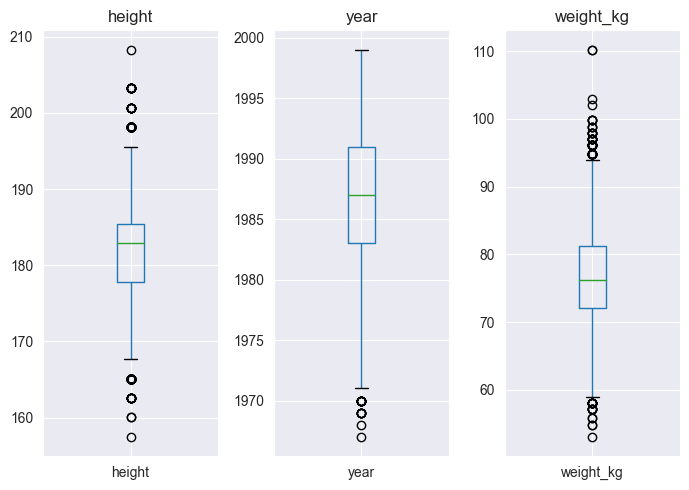

<IPython.core.display.Javascript object>

In [811]:
fig, axes = plt.subplots(nrows=1, ncols=len(player_numeric.columns), figsize=(7, 5))

for i, column in enumerate(player_numeric.columns):
    ax = (
        axes[i] if len(player_numeric.columns) > 1 else axes
    ) 
    player_numeric.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()  
plt.show()

There are some outliers in this table. All of them seem to be in an acceptable range, thus, we will won't drop them for further analysis.

### 1.3.4. Distribution of values

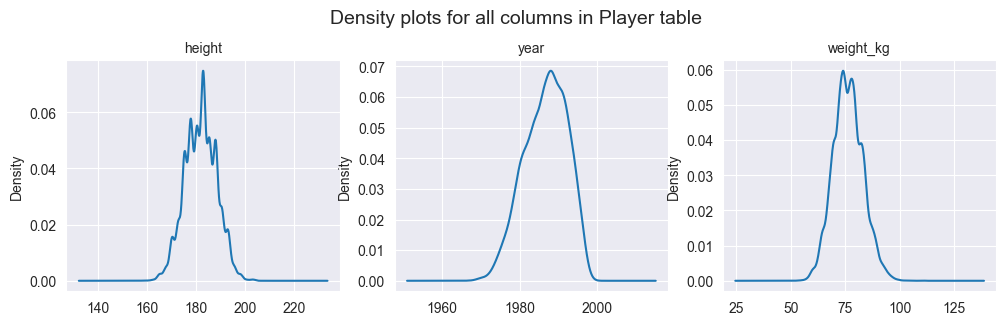

<IPython.core.display.Javascript object>

In [812]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
fig.subplots_adjust(hspace=0.5) 

for col, ax in zip(player_numeric.columns, axes.flatten()):
    player_numeric[col].plot(kind="density", ax=ax)
    ax.set_title(
        col, fontsize=10
    )  
    ax.set_xlabel("")  

fig.suptitle("Density plots for all columns in Player table", fontsize=14, y=1.05)

plt.show()

All of the distributions resemble normal.

### 1.3.5. Correlations

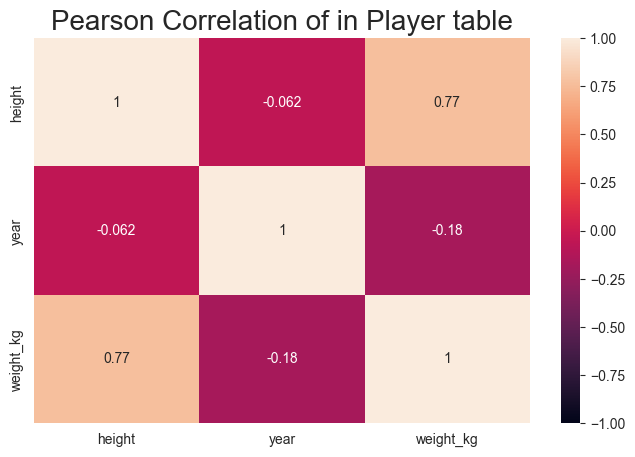

<IPython.core.display.Javascript object>

In [813]:
plt.figure(figsize=(8, 5))
plt.title("Pearson Correlation of in Player table", fontsize=20)
ax = sns.heatmap(player.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

Text(0.5, 1.02, 'Scatterplot Matrix for the Player table')

<Figure size 600x400 with 0 Axes>

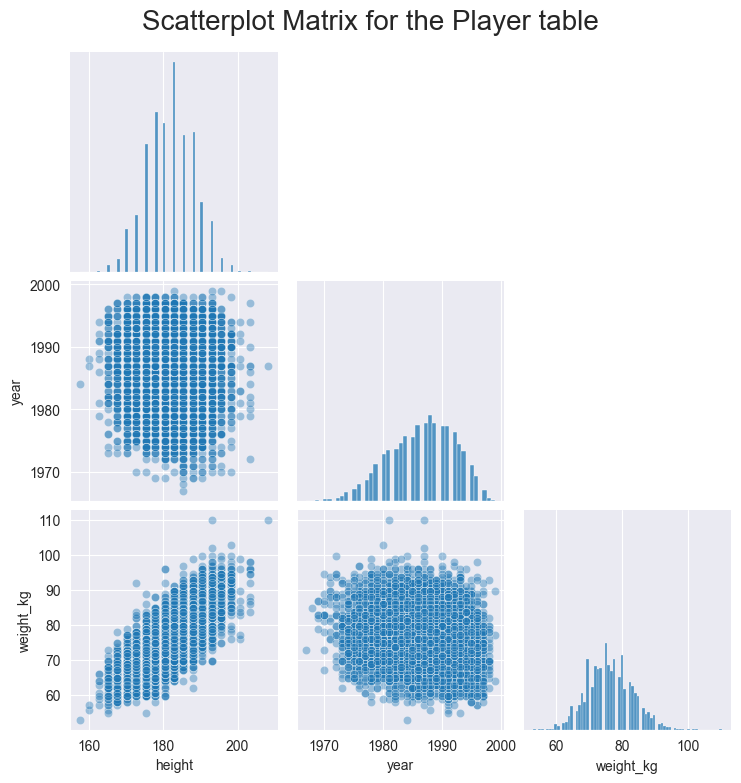

<IPython.core.display.Javascript object>

In [814]:
plt.figure(figsize=(6, 4))
pair_plot = sns.pairplot(
    player_numeric, corner=True, plot_kws={"alpha": 0.4}
)
plt.text(
    0.5,
    1.02,
    "Scatterplot Matrix for the Player table",
    transform=pair_plot.fig.transFigure,
    ha="center",
    va="center",
    fontsize=20,
)

We can observe that the columns weight and height are highly linearly correlated. We will create an additional combined column with calculated BMI. And for now, we won't drop the height and weight columns, since we may need them separately in our further analysis.

In [815]:
player_upd = player.copy()
player_upd['bmi'] = player_upd['weight_kg'] / ((player_upd['height'] / 100) ** 2)
player_upd['bmi'] = player_upd['bmi'].round(2)

<IPython.core.display.Javascript object>

Let's look into the BMI stats:

In [816]:
player_upd['bmi'].describe()

count    11060.000000
mean        23.066058
std          1.317058
min         17.590000
25%         22.170000
50%         23.060000
75%         23.870000
max         30.870000
Name: bmi, dtype: float64

<IPython.core.display.Javascript object>

General BMI categories:
- Underweight: BMI less than 18.5
- Normal weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obesity: BMI of 30 or higher

We can see that most of the players have a generally normal BMI score. Some of them have lower BMI which would mean that the player is leaner and less mascular, and some players have larger BMI that could mean that the player is more mascular or overweight. 

<Axes: title={'center': 'Box plot for BMI feature'}, xlabel='bmi'>

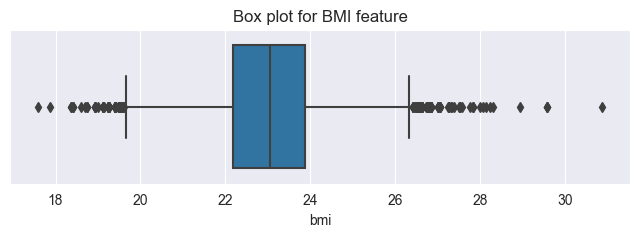

<IPython.core.display.Javascript object>

In [817]:
plt.figure(figsize=(8, 2))
plt.title('Box plot for BMI feature')
sns.boxplot(x=player_upd.bmi)

## 1.4. Match table

We will focus on analyzing data for the last 5 football seasons. To find the cut off point, we will find the dates of the first stages of each season:

In [704]:
pd.read_sql(
    """
            SELECT id, date, STRFTIME('%Y', date) AS year, stage
            FROM Match
            WHERE stage == 1
            GROUP BY year;
            """,
    conn, index_col='id',
)

date  year  stage
id                                    
1     2008-08-17 00:00:00  2008      1
307   2009-07-31 00:00:00  2009      1
517   2010-07-31 00:00:00  2010      1
757   2011-07-29 00:00:00  2011      1
997   2012-07-28 00:00:00  2012      1
3629  2013-08-17 00:00:00  2013      1
1237  2014-03-29 00:00:00  2014      1
1489  2015-07-24 00:00:00  2015      1

<IPython.core.display.Javascript object>

In [705]:
match = pd.read_sql(
    """
            SELECT *
            FROM Match
            WHERE date >= '2011-07-29 00:00:00';
            """,
    conn, index_col='id',
)
match

country_id  league_id     season  stage                 date  \
id                                                                    
757             1          1  2011/2012      1  2011-07-29 00:00:00   
758             1          1  2011/2012      1  2011-07-30 00:00:00   
759             1          1  2011/2012      1  2011-07-30 00:00:00   
760             1          1  2011/2012      1  2011-07-30 00:00:00   
761             1          1  2011/2012      1  2011-07-30 00:00:00   
...           ...        ...        ...    ...                  ...   
25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                        
757         1032692              1773              8635               2   
758         1032693              9998              9985               1   
759         1032694              9987              9993               3   
760         1032695              9991              9984               0   
761         1032696              9994             10000               0   
...             ...               ...               ...             ...   
25975       1992091             10190             10191               1   
25976       1992092              9824             10199               1   
25977       1992093              9956             10179               2   
25978       1992094              7896             10243               0   
25979       1992095             10192              9931               4   

       away_team_goal  ...   SJA   VCH  VCD   VCA   GBH   GBD   GBA   BSH  \
id                     ...                                                  
757                 1  ...  1.57  7.00  4.0  1.50  6.00  3.75  1.50  6.50   
758                 1  ...  1.73  4.75  3.6  1.75  4.50  3.40  1.72  4.50   
759                 1  ...  6.50  1.44  4.5  7.00  1.45  4.00  6.25  1.44   
760                 1  ...  6.00  1.53  4.0  6.00  1.55  3.75  5.50  1.53   
761                 0  ...  3.20  2.20  3.3  3.30  2.15  3.25  3.10  2.20   
...               ...  ...   ...   ...  ...   ...   ...   ...   ...   ...   
25975               0  ...   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
25976               2  ...   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
25977               0  ...   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
25978               0  ...   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
25979               3  ...   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   

        BSD   BSA  
id                 
757    4.00  1.44  
758    3.60  1.67  
759    4.00  6.50  
760    3.75  5.50  
761    3.30  2.88  
...     ...   ...  
25975   NaN   NaN  
25976   NaN   NaN  
25977   NaN   NaN  
25978   NaN   NaN  
25979   NaN   NaN  

[16148 rows x 114 columns]

<IPython.core.display.Javascript object>

In [706]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16148 entries, 757 to 25979
Columns: 114 entries, country_id to BSA
dtypes: float64(96), int64(8), object(10)
memory usage: 14.2+ MB


<IPython.core.display.Javascript object>

In [707]:
match.select_dtypes(include='object').columns

Index(['season', 'date', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession'],
      dtype='object')

<IPython.core.display.Javascript object>

The columns 'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession' contain XML data. We will focus on goal data.

In [708]:
match.select_dtypes(include='float').columns

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 

<IPython.core.display.Javascript object>

In [709]:
match.select_dtypes(include='int').columns

Index(['country_id', 'league_id', 'stage', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal'],
      dtype='object')

<IPython.core.display.Javascript object>

For this analysis, we won't focus on the positions of players on the field, thus, we will drop those columns:

In [710]:
positions_cols = [f"{a}_player_{b}{c}" for a in ['home', 'away'] for b in ['X', 'Y'] for c in range(1, 12)] 
match.drop(columns=positions_cols, inplace=True)

<IPython.core.display.Javascript object>

In [711]:
player_ids = [f'{a}_player_{b}' for a in ['home', 'away'] for b in range(1, 12)]
object_cols_pa = ['country_id', 'league_id', 'stage', 'match_api_id',
                  'home_team_api_id', 'away_team_api_id']
match[player_ids + object_cols_pa] = match[player_ids + object_cols_pa].astype("object")
match.date = pd.to_datetime(match['date'])

<IPython.core.display.Javascript object>

In [712]:
match.describe().T

count                           mean                  min  \
date              16148  2014-01-06 10:13:15.442160128  2011-07-29 00:00:00   
home_team_goal  16148.0                       1.552886                  0.0   
away_team_goal  16148.0                       1.184357                  0.0   
B365H           14047.0                       2.680244                 1.04   
B365D           14047.0                       3.930556                 1.73   
B365A           14047.0                       4.693438                 1.08   
BWH             14043.0                       2.618599                 1.03   
BWD             14043.0                       3.830982                 1.67   
BWA             14043.0                       4.462302                  1.1   
IWH             14003.0                       2.520563                 1.03   
IWD             14003.0                       3.674138                  1.6   
IWA             14003.0                       4.182409                  1.1   
LBH             14024.0                       2.611918                 1.04   
LBD             14024.0                       3.816162                 1.83   
LBA             14024.0                       4.494195                  1.1   
PSH             11168.0                       2.816447                 1.04   
PSD             11168.0                       4.132324                  2.2   
PSA             11168.0                       4.972744                 1.09   
WHH             14041.0                       2.649479                 1.02   
WHD             14041.0                       3.722944                 1.02   
WHA             14041.0                       4.567854                 1.08   
SJH              8567.0                       2.608174                 1.05   
SJD              8567.0                        3.83756                  1.8   
SJA              8567.0                       4.622955                 1.13   
VCH             14043.0                       2.761709                 1.03   
VCD             14043.0                       4.047175                  2.0   
VCA             14043.0                       5.009643                 1.08   
GBH              5625.0                       2.542075                 1.05   
GBD              5625.0                       3.752572                 1.67   
GBA              5625.0                        4.43392                 1.12   
BSH              5635.0                       2.545324                 1.05   
BSD              5635.0                       3.771455                 1.73   
BSA              5635.0                       4.475659                 1.14   

                                25%                  50%                  75%  \
date            2012-10-27 00:00:00  2014-01-17 00:00:00  2015-03-22 00:00:00   
home_team_goal                  1.0                  1.0                  2.0   
away_team_goal                  0.0                  1.0                  2.0   
B365H                          1.67                  2.1                  2.8   
B365D                           3.3                  3.5                  4.0   
B365A                           2.5                  3.5                  5.0   
BWH                            1.67                 2.15                  2.8   
BWD                            3.25                  3.4                  3.9   
BWA                             2.5                  3.4                  5.0   
IWH                             1.7                  2.1                 2.65   
IWD                             3.2                  3.3                  3.7   
IWA                             2.5                  3.3                  4.6   
LBH                            1.67                  2.1                 2.75   
LBD                            3.25                  3.4                  3.8   
LBA                             2.5                  3.4                  5.0   
PSH                            1.72

<IPython.core.display.Javascript object>

### 1.4.1. Missing values

<Axes: >

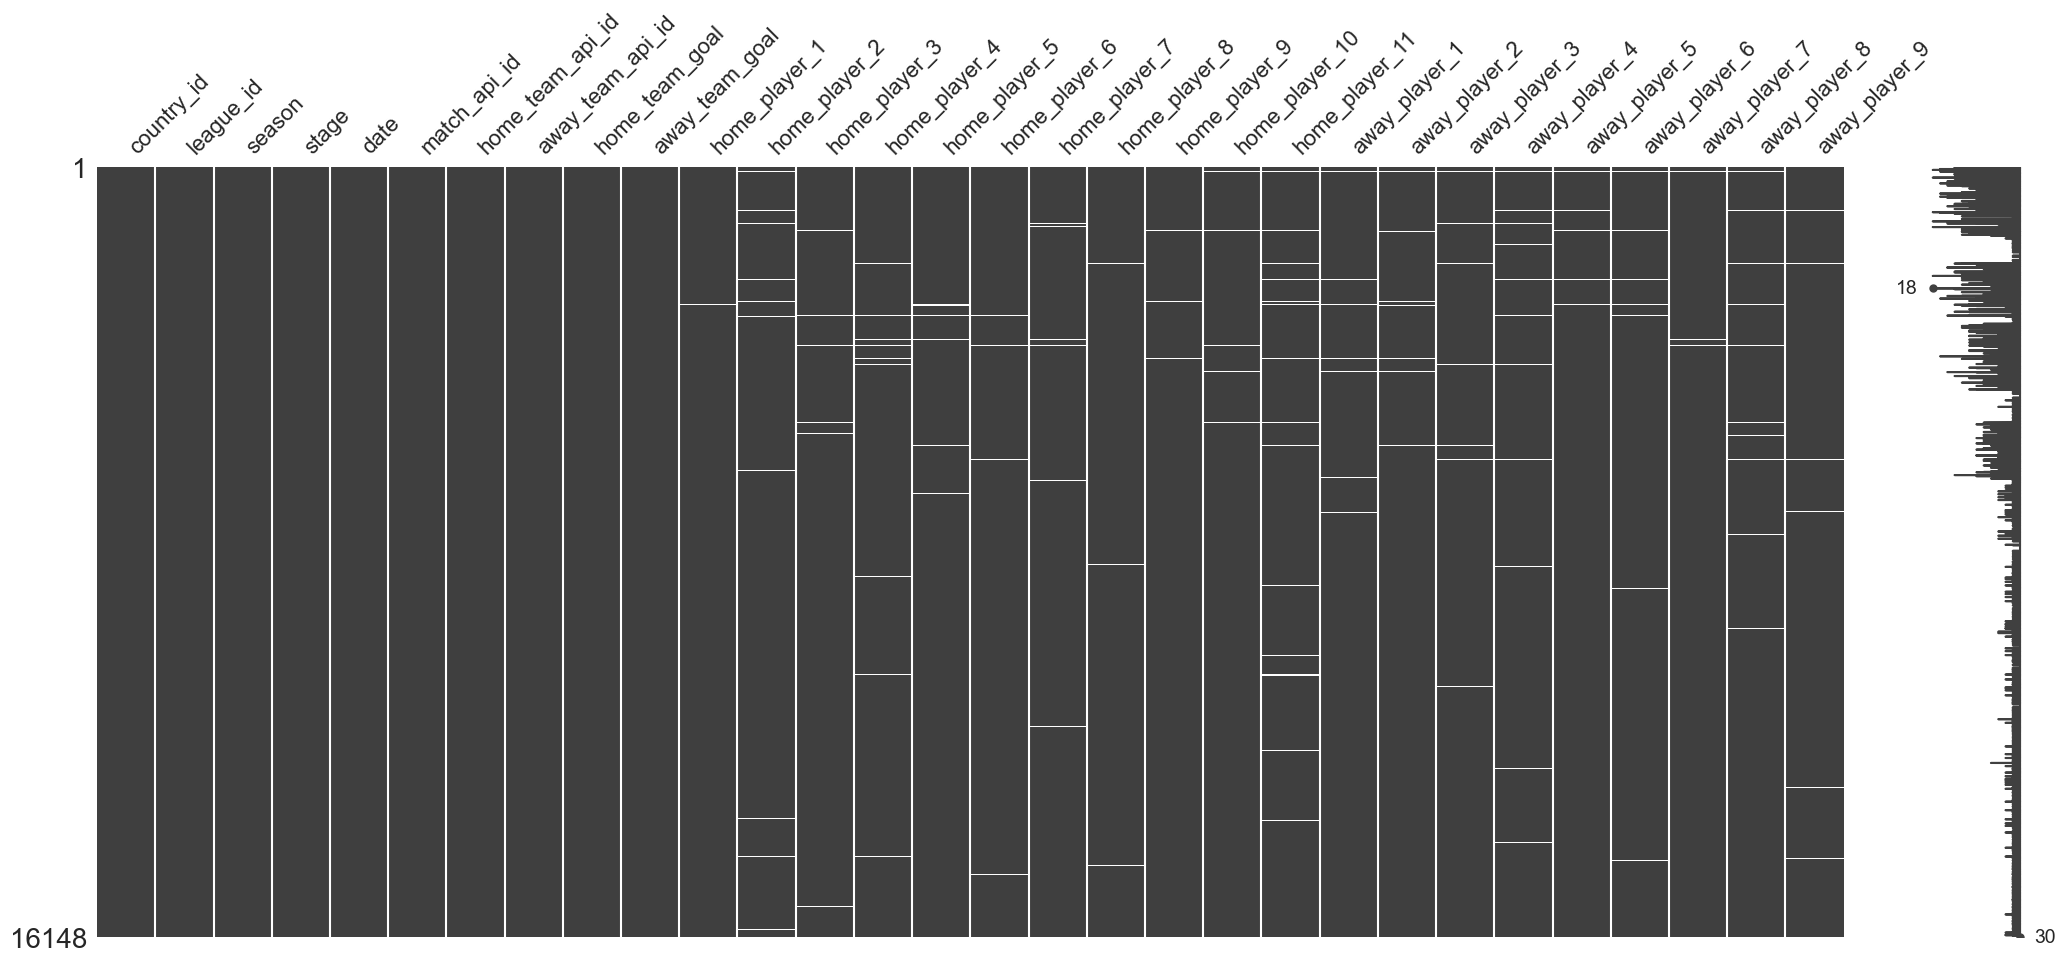

<IPython.core.display.Javascript object>

In [713]:
msno.matrix(match.sort_values(by='date').iloc[:, :30])

<Axes: >

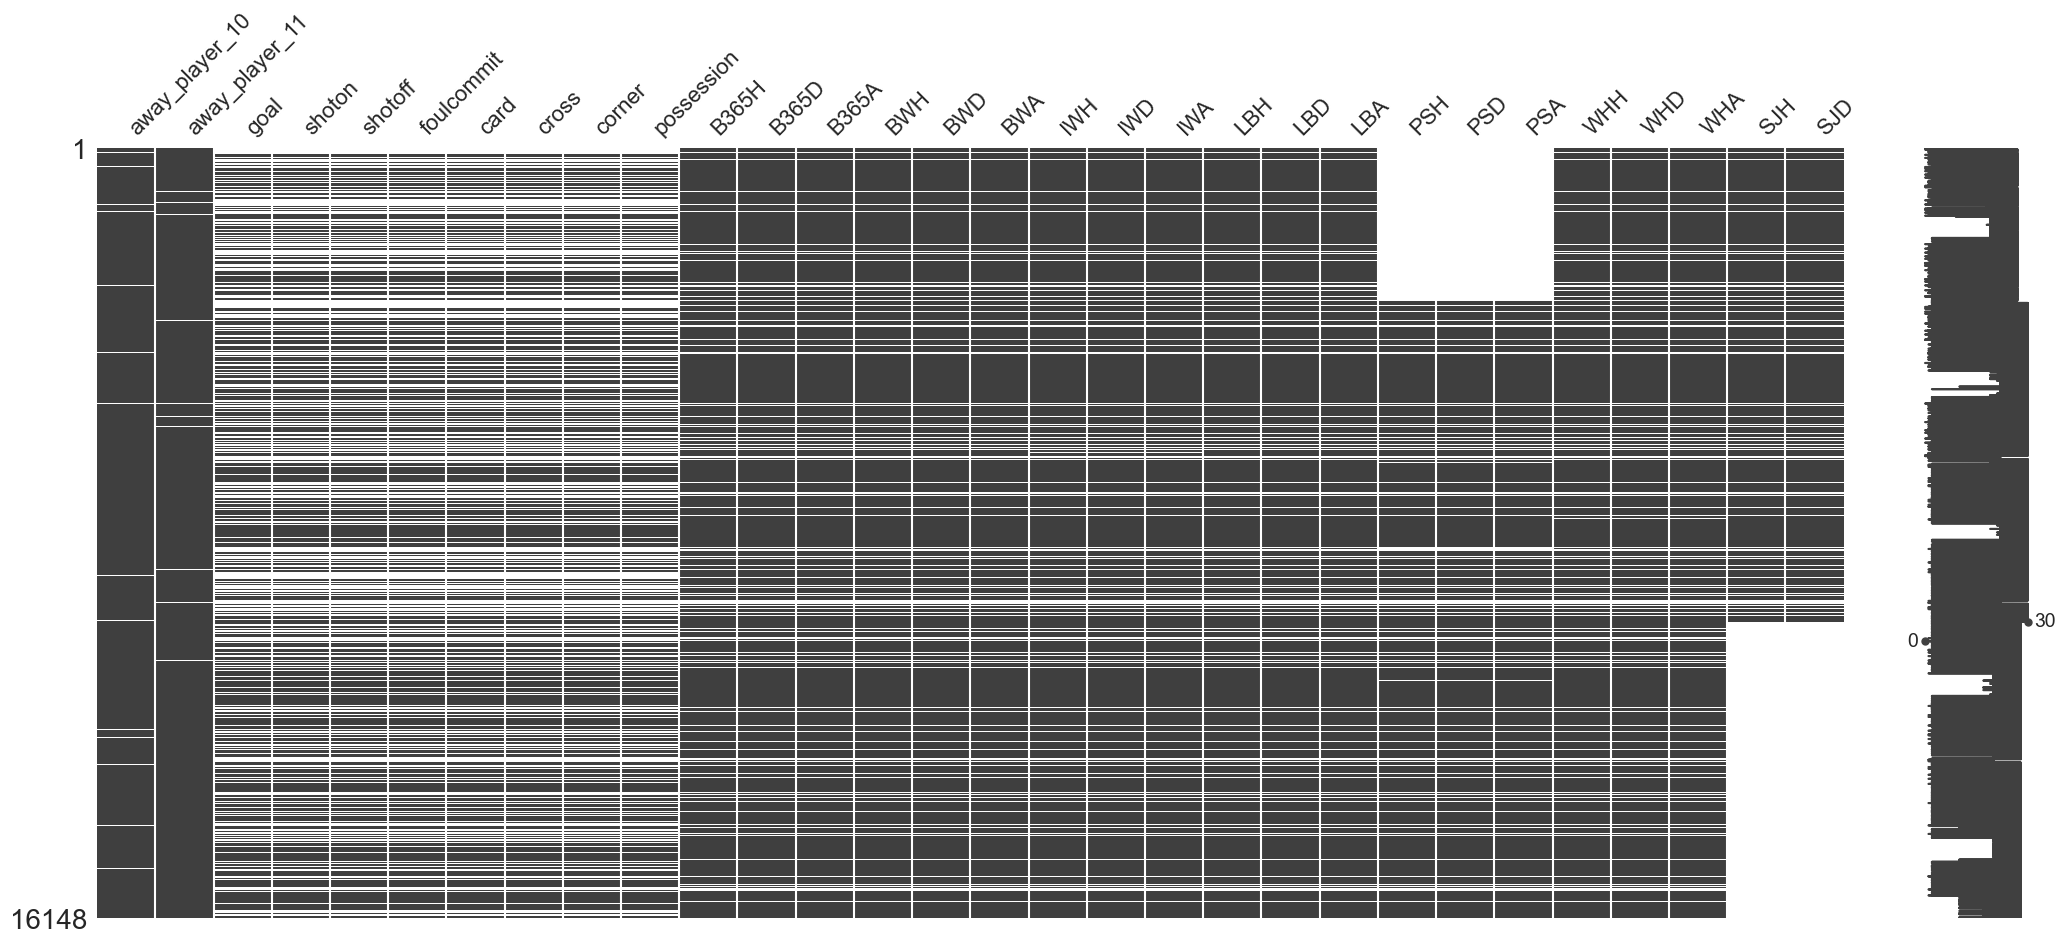

<IPython.core.display.Javascript object>

In [714]:
msno.matrix(match.sort_values(by='date').iloc[:, 30:60])

<Axes: >

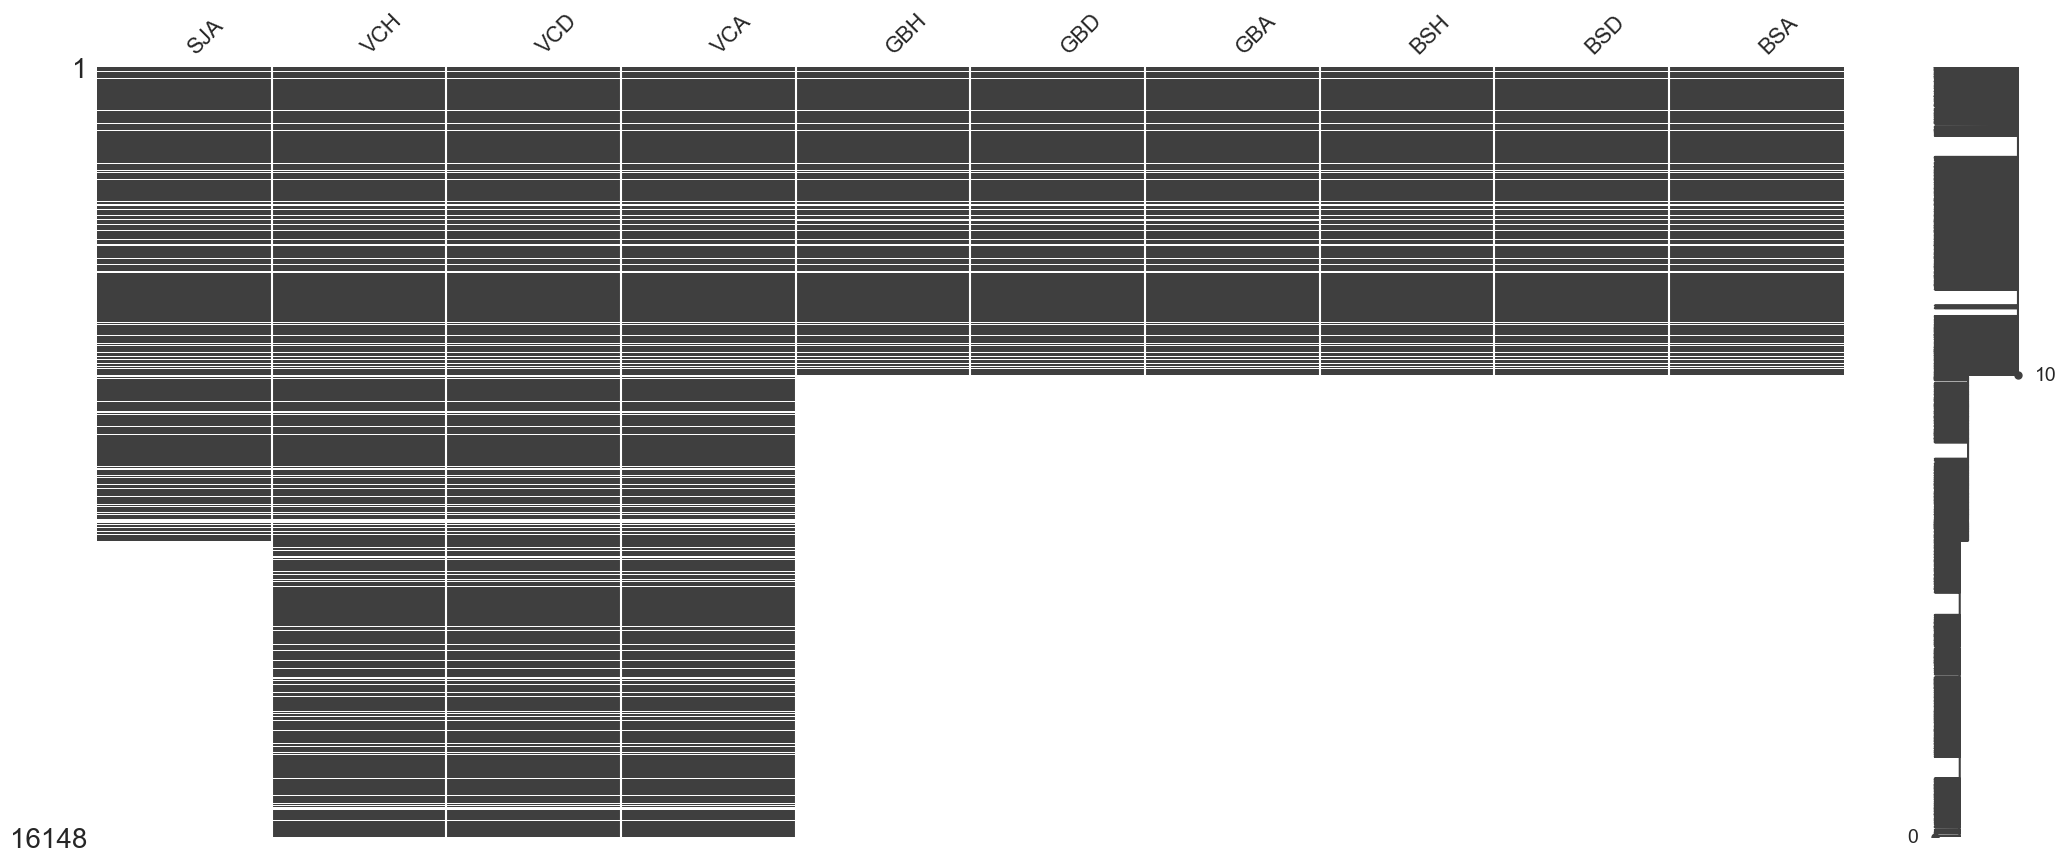

<IPython.core.display.Javascript object>

In [715]:
msno.matrix(match.sort_values(by='date').iloc[:, 60:])

In [716]:
# proportion of missing values
miss_prop = match.isna().sum() / len(match.index)
miss_prop[miss_prop > 0].sort_values(ascending=False)

GBA               0.651660
GBD               0.651660
GBH               0.651660
BSA               0.651040
BSD               0.651040
BSH               0.651040
SJA               0.469470
SJD               0.469470
SJH               0.469470
card              0.403765
shoton            0.403765
shotoff           0.403765
foulcommit        0.403765
cross             0.403765
corner            0.403765
possession        0.403765
goal              0.403765
PSH               0.308397
PSD               0.308397
PSA               0.308397
IWA               0.132834
IWD               0.132834
IWH               0.132834
LBA               0.131533
LBD               0.131533
LBH               0.131533
WHH               0.130481
WHD               0.130481
WHA               0.130481
BWA               0.130357
VCH               0.130357
VCD               0.130357
VCA               0.130357
BWH               0.130357
BWD               0.130357
B365H             0.130109
B365A             0.130109
B

<IPython.core.display.Javascript object>

- There are multiple columns that have a high proportion of missing values. Some of those columns contain XML data, others contain betting odds from different bookmakers. 
- The columns with XML data('goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession') have missing values throughout the whole table. The reason could be that this info is given only at certain stages of the season.
- The columns with betting odds data, many of them don't have any values for the last seasons, and some of them don't have data for the oldest seasons in our table. Also, we can see that the missing values for all betting columns are scattered almost evenly in time, which may indicate that this data is given at certain stages of a season.
- Since the XML columns and most of betting odds columns are of no particular interest in this data analysis, we will drop the columns that contain more than 30% of missing data and then we will drop the rows with missing values for the rest of columns.

In [717]:
missing_cols = miss_prop.index[miss_prop > 0.3].tolist()
match.drop(columns=missing_cols, inplace=True)

<IPython.core.display.Javascript object>

In [718]:
match.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [719]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13068 entries, 757 to 24557
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country_id        13068 non-null  object        
 1   league_id         13068 non-null  object        
 2   season            13068 non-null  object        
 3   stage             13068 non-null  object        
 4   date              13068 non-null  datetime64[ns]
 5   match_api_id      13068 non-null  object        
 6   home_team_api_id  13068 non-null  object        
 7   away_team_api_id  13068 non-null  object        
 8   home_team_goal    13068 non-null  int64         
 9   away_team_goal    13068 non-null  int64         
 10  home_player_1     13068 non-null  object        
 11  home_player_2     13068 non-null  object        
 12  home_player_3     13068 non-null  object        
 13  home_player_4     13068 non-null  object        
 14  home_player_5     13068 n

<IPython.core.display.Javascript object>

- As a result of we have dropped 3080 rows of data and 20 columns with high percentage of missing values.

### 1.4.2. Duplicate values

There are no duplicate values in the Match table.

In [720]:
len(match) - len(match.drop_duplicates())  # count duplicate values

0

<IPython.core.display.Javascript object>

In [721]:
match[match.duplicated()]  # get duplicated rows

Empty DataFrame
Columns: [country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, home_player_1, home_player_2, home_player_3, home_player_4, home_player_5, home_player_6, home_player_7, home_player_8, home_player_9, home_player_10, home_player_11, away_player_1, away_player_2, away_player_3, away_player_4, away_player_5, away_player_6, away_player_7, away_player_8, away_player_9, away_player_10, away_player_11, B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA, WHH, WHD, WHA, VCH, VCD, VCA]
Index: []

[0 rows x 50 columns]

<IPython.core.display.Javascript object>

### 1.4.3. Handling outliers

Before visualizing outliers, we will convert betting odds to probabilities.

Additional resources used:
__[Betting odds explained](https://www.bookmakers.eu/odds/)__

In [722]:
match_upd = match.copy()
bookmaker_cols = [['B365H', 'B365D', 'B365A'],
                  ['BWH', 'BWD', 'BWA'],
                  ['IWH', 'IWD', 'IWA'],
                  ['LBH', 'LBD', 'LBA'],
                  ['WHH', 'WHD', 'WHA'],
                  ['VCH', 'VCD', 'VCA']]
all_bookmakers = [j for i in bookmaker_cols for j in i]

for column in all_bookmakers:
    match_upd[column] = round(1 / match_upd[column], 2)

<IPython.core.display.Javascript object>

In [723]:
num_cols_match = match_upd.select_dtypes(exclude=["object", "datetime64[ns]"]).columns.tolist()
match_numeric = match_upd[num_cols_match]

<IPython.core.display.Javascript object>

Now, let's visualize box plots first for non-bookmaker probabilites columns, and then for all the bookmaker columns.

<Axes: >

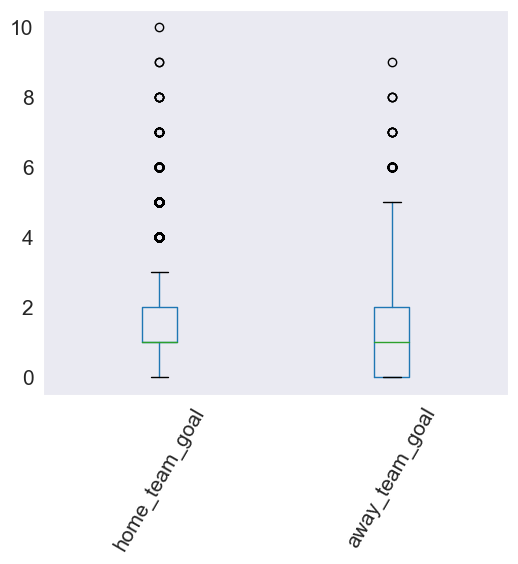

<IPython.core.display.Javascript object>

In [724]:
match_numeric.iloc[:, :2].boxplot(grid=False, rot=60, fontsize=15, figsize=(6, 5))

<Axes: >

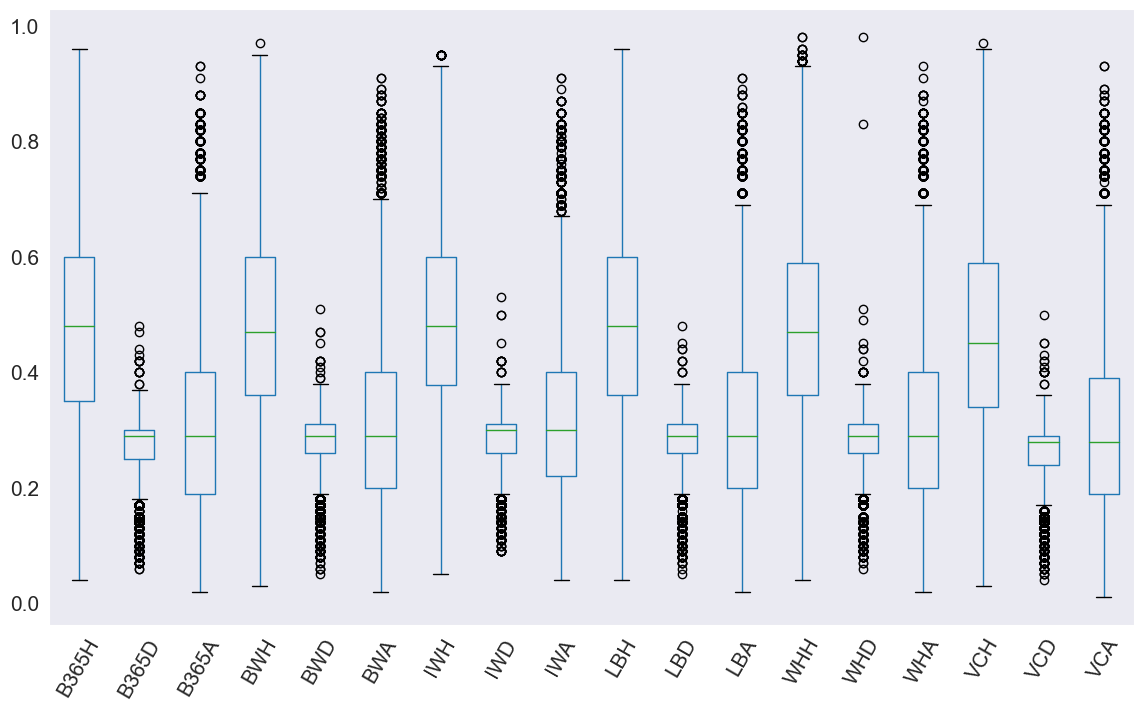

<IPython.core.display.Javascript object>

In [725]:
match_numeric[all_bookmakers].boxplot(grid=False, rot=60, fontsize=15, figsize=(14, 8))

- There are some outliers for each column in the Match table, but the values are in acceptable range, so won't drop them and use in further analysis.
- It looks like the bookmakers' expected probabilities for Home team winning are usually higher.

### 1.4.4. Categorical features

In [726]:
cat_cols_match = match_upd.select_dtypes(include=['object', 'category']).columns
match_cat = match_upd[cat_cols_match]

<IPython.core.display.Javascript object>

In [727]:
cat_cols_match

Index(['country_id', 'league_id', 'season', 'stage', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11'],
      dtype='object')

<IPython.core.display.Javascript object>

In [728]:
for col in match_cat[['season', 'stage']]:
    print(f"Unique values for {col}:")
    print(match_cat[col].sort_values().unique())
    print("-"*20)

Unique values for season:
['2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016']
--------------------
Unique values for stage:
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38]
--------------------


<IPython.core.display.Javascript object>

All the values in the categorical columns 'season' and 'stage' look valid. Other categorical columns contain IDs.

### 1.4.5. Distribution of values

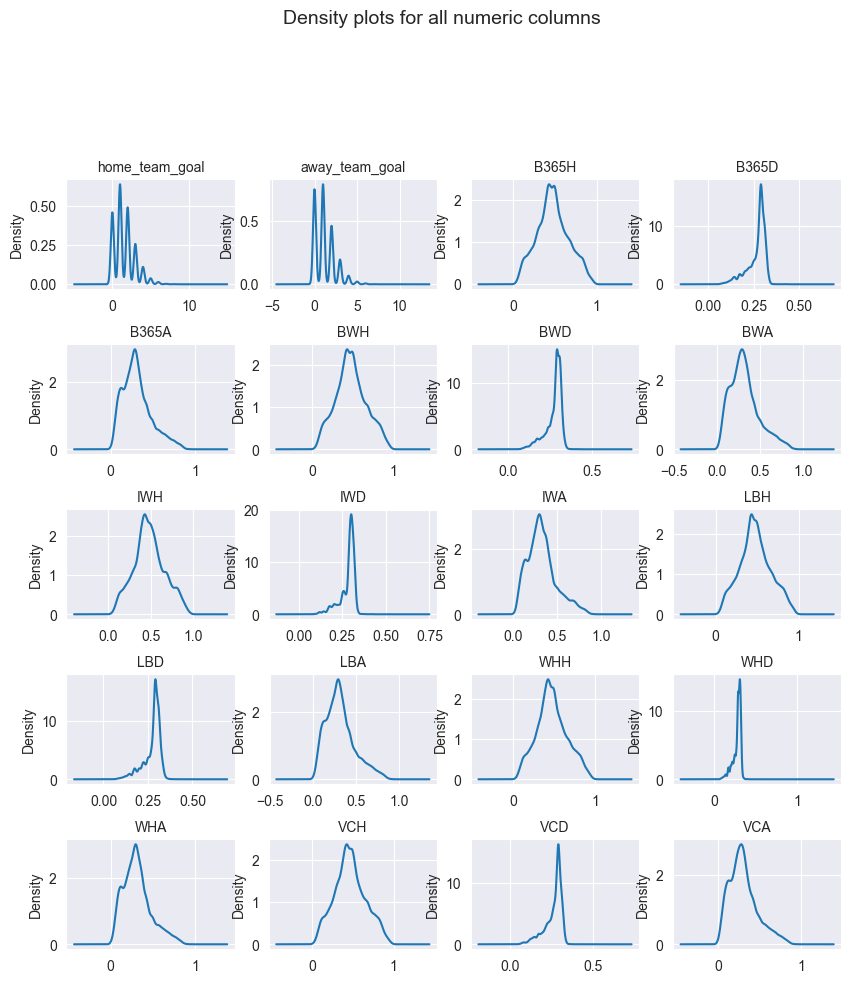

<IPython.core.display.Javascript object>

In [729]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5) 

for col, ax in zip(match_numeric.columns, axes.flatten()):
    match_numeric[col].plot(kind="density", ax=ax)
    ax.set_title(
        col, fontsize=10
    )  
    ax.set_xlabel("")  

fig.suptitle("Density plots for all numeric columns", fontsize=14, y=1.05)

plt.show()

We can observe that the distribution for certain types (H-home team, D-draw, A-away team) of betting probabilities are very similar. Also, home team and away team goal columns have similar distributions but in different ranges.

Now, let's see the countplots for certain categorical values:

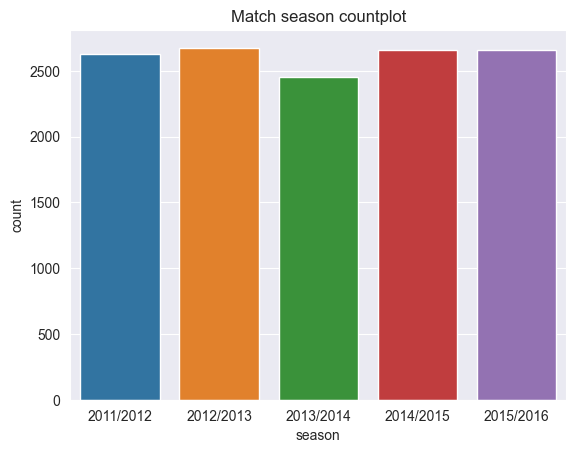

<IPython.core.display.Javascript object>

In [730]:
sns.countplot(
    x=match_upd['season'].sort_values()
)
plt.title("Match season countplot")
plt.show()

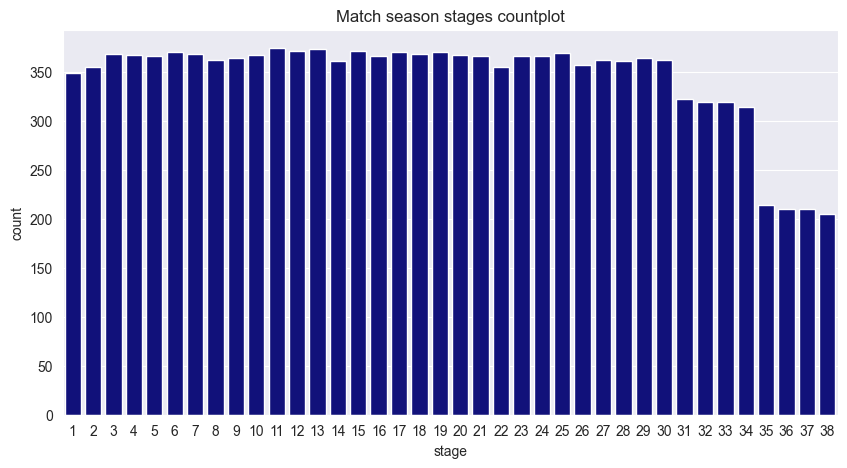

<IPython.core.display.Javascript object>

In [731]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x=match_upd['stage'].sort_values(),color='darkblue',
)
plt.title("Match season stages countplot")
plt.show()

We have fewer data points for the match season 2013/2014, and for the final season stages 35-38.

### 1.4.6. Correlations

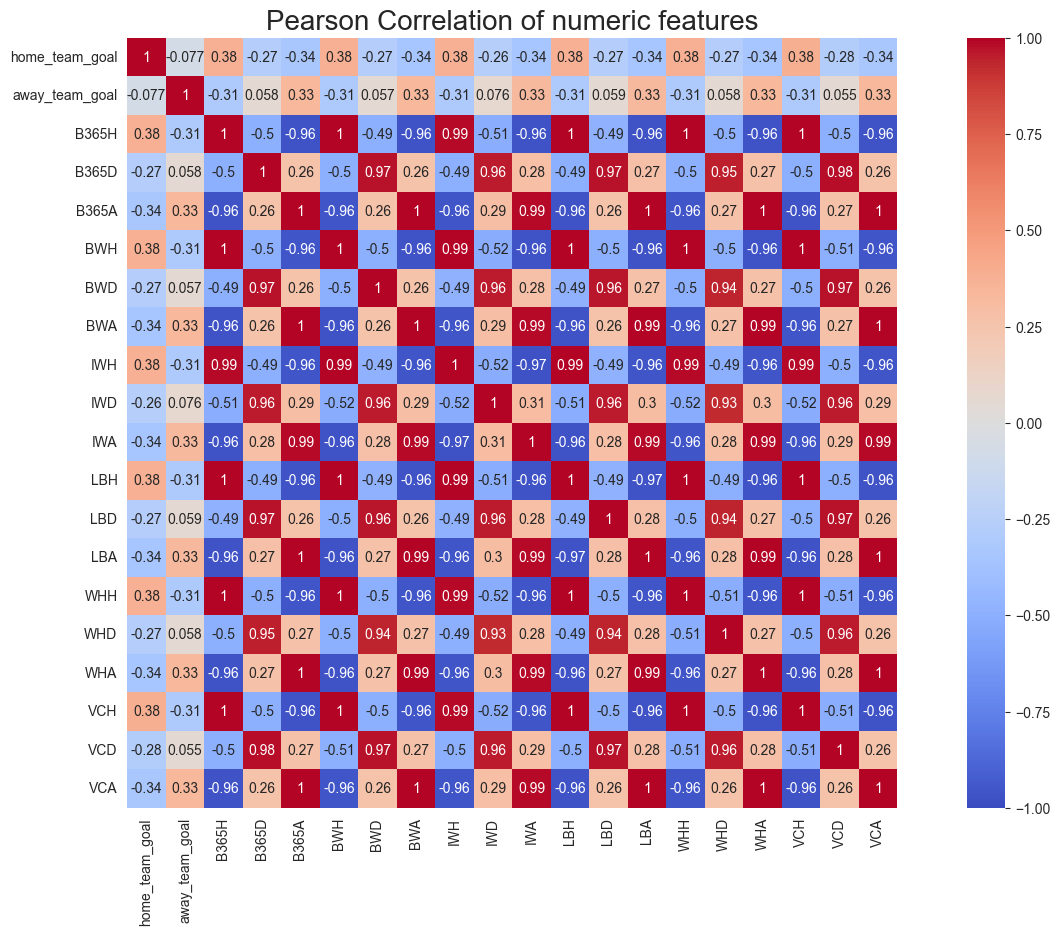

<IPython.core.display.Javascript object>

In [732]:
# Plot correlations with annotations
plt.figure(figsize=(18, 10))
plt.title("Pearson Correlation of numeric features", fontsize=20)
ax = sns.heatmap(match_upd.corr(numeric_only=True, method='pearson'), cmap="coolwarm", 
                 vmin=-1, vmax=1, square=True, annot=True)

We can observe that there are betting probabilities of different bookmakers are extremely correlated. Thus, we will create new combined columns that would show an average probability given by all bookmakers.

In [733]:
match_reduced = match_upd.copy()
team_type = ['H', 'D', 'A']
for team in team_type:
    prob_columns = [col for col in all_bookmakers if team in col[-1]]
    match_reduced[f'{team}_bet_prob'] = match_reduced[prob_columns].mean(axis=1)
match_reduced.drop(columns=all_bookmakers, inplace=True)

<IPython.core.display.Javascript object>

As a result, we have a final version of the Match table (so far) - match_reduced with combined betting probabilities from all bookmaker betting odds.

## 1.5. League table

In [734]:
league = pd.read_sql(
    """
            SELECT *
            FROM League;
            """,
    conn, index_col='id',
)
league

country_id                      name
id                                         
1               1    Belgium Jupiler League
1729         1729    England Premier League
4769         4769            France Ligue 1
7809         7809     Germany 1. Bundesliga
10257       10257             Italy Serie A
13274       13274    Netherlands Eredivisie
15722       15722        Poland Ekstraklasa
17642       17642  Portugal Liga ZON Sagres
19694       19694   Scotland Premier League
21518       21518           Spain LIGA BBVA
24558       24558  Switzerland Super League

<IPython.core.display.Javascript object>

In [735]:
league.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 24558
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country_id  11 non-null     int64 
 1   name        11 non-null     object
dtypes: int64(1), object(1)
memory usage: 264.0+ bytes


<IPython.core.display.Javascript object>

In [736]:
league['country_id'] = league['country_id'].astype("object")

<IPython.core.display.Javascript object>

In [737]:
league.describe().T

count unique                     top freq
country_id    11     11                       1    1
name          11     11  Belgium Jupiler League    1

<IPython.core.display.Javascript object>

In [738]:
league.name.unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

<IPython.core.display.Javascript object>

### 1.5.1. Missing values

There are no missing values.

<Axes: >

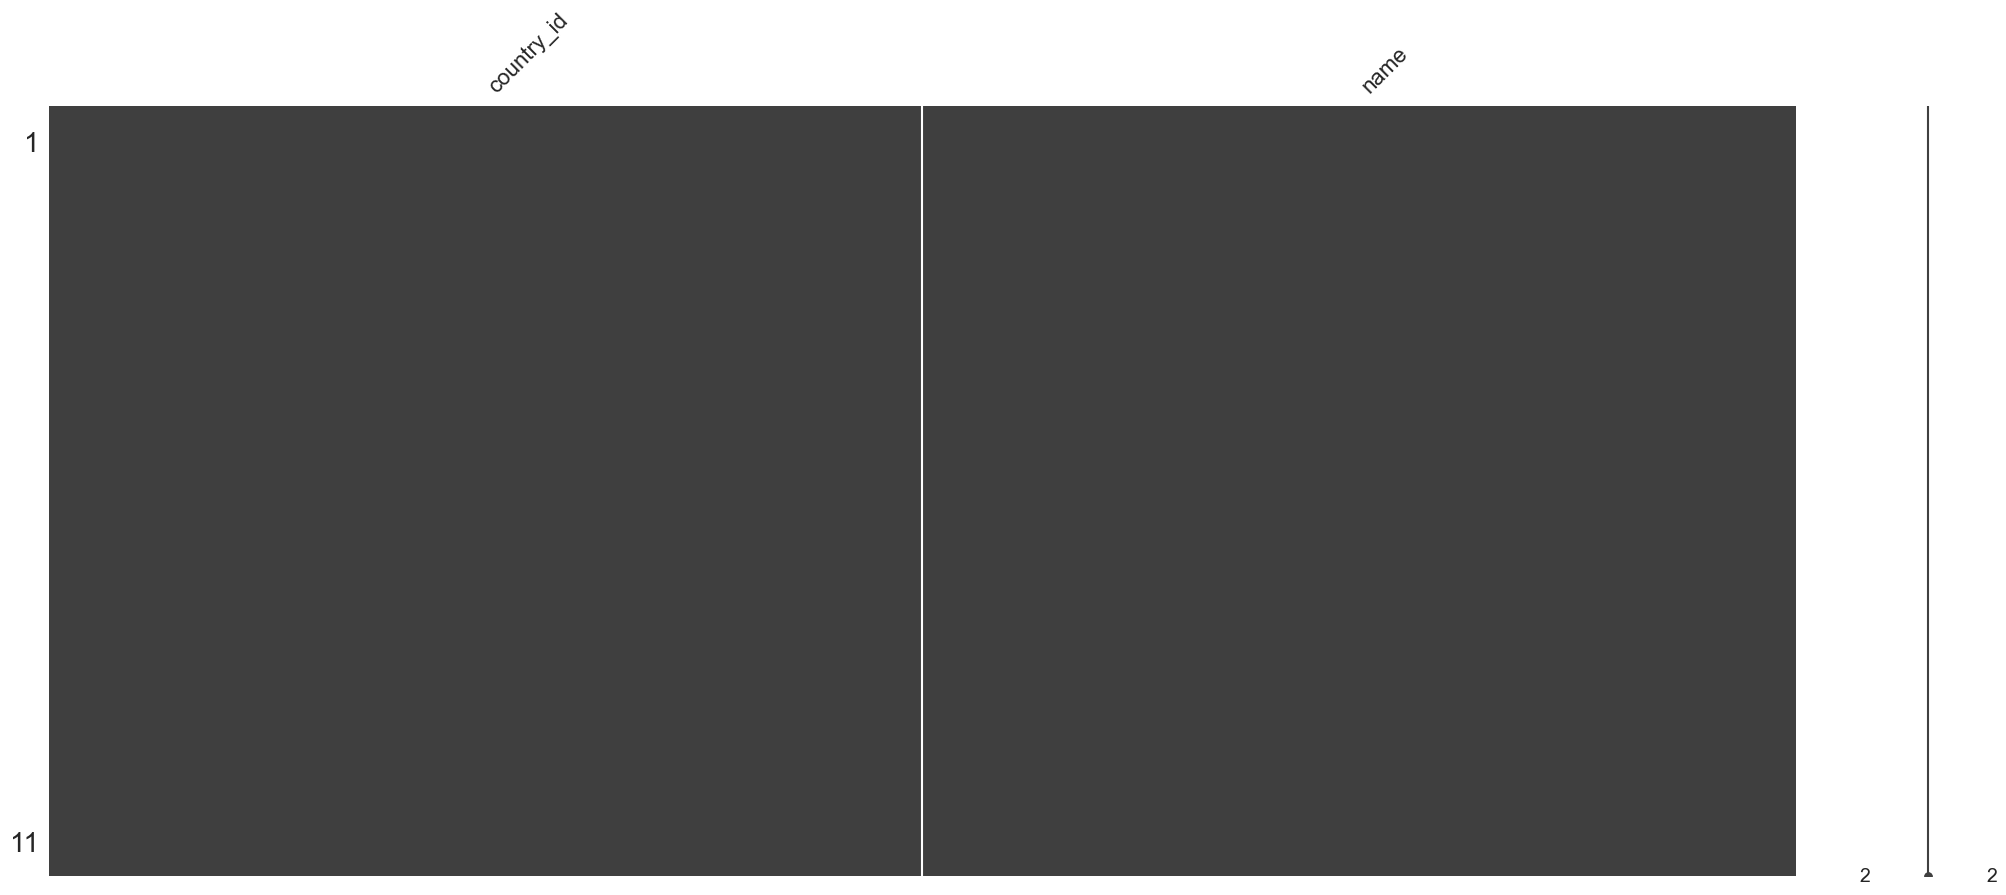

<IPython.core.display.Javascript object>

In [739]:
msno.matrix(league)

In [740]:
league.isna().sum().sort_values(ascending=False)

country_id    0
name          0
dtype: int64

<IPython.core.display.Javascript object>

### 1.5.2. Duplicate values

There are no duplicates in this table.

In [741]:
len(league) - len(league.drop_duplicates())  # count duplicate values

0

<IPython.core.display.Javascript object>

## 1.6. Country table

In [742]:
country = pd.read_sql(
    """
            SELECT *
            FROM Country;
            """,
    conn, index_col='id',
)
country

name
id                
1          Belgium
1729       England
4769        France
7809       Germany
10257        Italy
13274  Netherlands
15722       Poland
17642     Portugal
19694     Scotland
21518        Spain
24558  Switzerland

<IPython.core.display.Javascript object>

In [743]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 24558
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes


<IPython.core.display.Javascript object>

In [744]:
country.name.unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'],
      dtype=object)

<IPython.core.display.Javascript object>

### 1.6.1. Missing values

There are no missing values.

In [745]:
# proportion of missing values
country.isna().sum() / country.count()

name    0.0
dtype: float64

<IPython.core.display.Javascript object>

## 1.7. Team table

In [746]:
team = pd.read_sql(
    """
            SELECT *
            FROM Team;
            """,
    conn, index_col='id',
)
team

team_api_id  team_fifa_api_id      team_long_name team_short_name
id                                                                      
1             9987             673.0            KRC Genk             GEN
2             9993             675.0        Beerschot AC             BAC
3            10000           15005.0    SV Zulte-Waregem             ZUL
4             9994            2007.0    Sporting Lokeren             LOK
5             9984            1750.0   KSV Cercle Brugge             CEB
...            ...               ...                 ...             ...
49479        10190             898.0       FC St. Gallen             GAL
49837        10191            1715.0             FC Thun             THU
50201         9777             324.0         Servette FC             SER
50204         7730            1862.0  FC Lausanne-Sports             LAU
51606         7896               NaN              Lugano             LUG

[299 rows x 4 columns]

<IPython.core.display.Javascript object>

In [747]:
team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 1 to 51606
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team_api_id       299 non-null    int64  
 1   team_fifa_api_id  288 non-null    float64
 2   team_long_name    299 non-null    object 
 3   team_short_name   299 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.7+ KB


<IPython.core.display.Javascript object>

In [748]:
object_cols_team = ['team_api_id', 'team_fifa_api_id']
team[object_cols_team] = team[object_cols_team].astype("object")

<IPython.core.display.Javascript object>

In [749]:
team.describe().T

count unique          top freq
team_api_id         299    299         9987    1
team_fifa_api_id  288.0  285.0     111429.0  2.0
team_long_name      299    296  Widzew Łódź    2
team_short_name     299    259          GEN    3

<IPython.core.display.Javascript object>

### 1.7.1. Missing values

<Axes: >

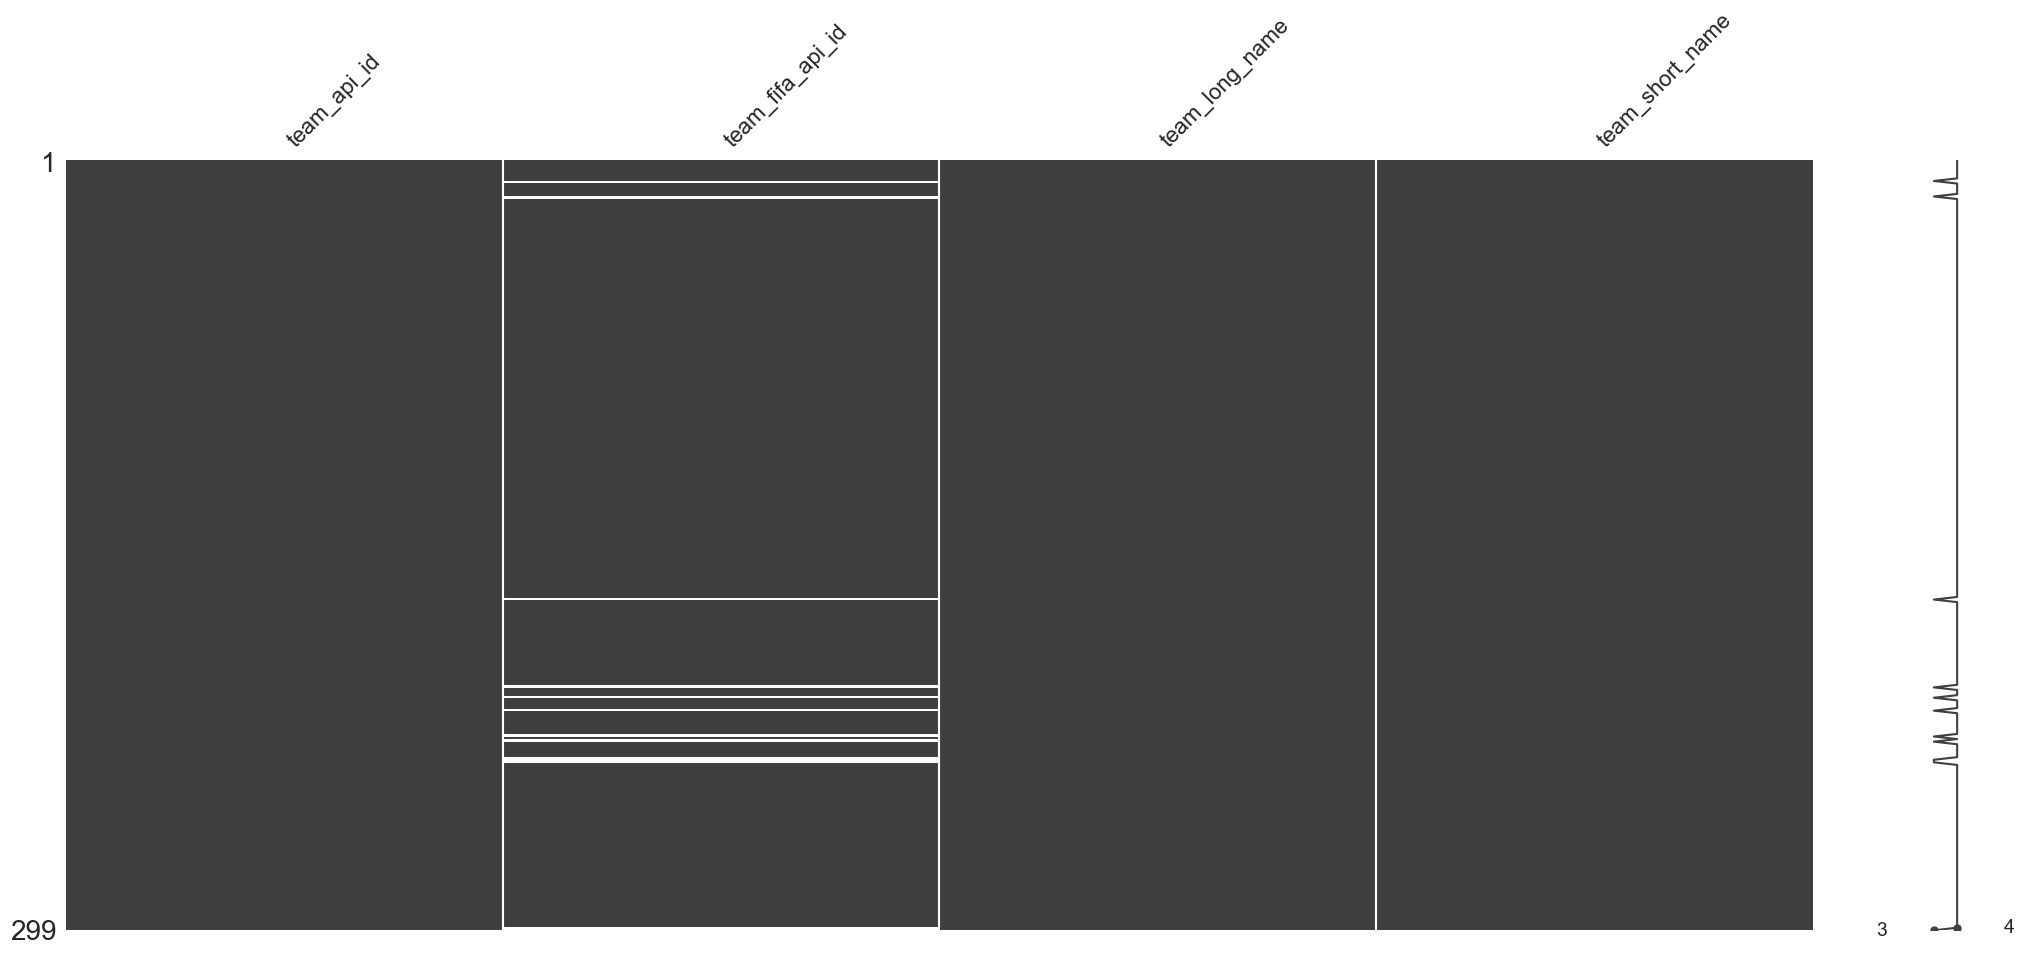

<IPython.core.display.Javascript object>

In [750]:
msno.matrix(team)

In [751]:
team.isna().sum().sort_values(ascending=False)

team_fifa_api_id    11
team_api_id          0
team_long_name       0
team_short_name      0
dtype: int64

<IPython.core.display.Javascript object>

In [752]:
team[team.team_fifa_api_id.isna()]

team_api_id team_fifa_api_id                team_long_name  \
id                                                                 
9            7947              NaN                 FCV Dender EH   
15           4049              NaN                        Tubize   
26561        6601              NaN                   FC Volendam   
34816      177361              NaN  Termalica Bruk-Bet Nieciecza   
35286        7992              NaN                      Trofense   
35291       10213              NaN                       Amadora   
36248        9765              NaN                  Portimonense   
36723        4064              NaN                      Feirense   
38789        6367              NaN              Uniao da Madeira   
38791      188163              NaN                       Tondela   
51606        7896              NaN                        Lugano   

      team_short_name  
id                     
9                 DEN  
15                TUB  
26561             VOL  
34816             TBN  
35286             TRO  
35291             AMA  
36248             POR  
36723             FEI  
38789             MAD  
38791             TON  
51606             LUG

<IPython.core.display.Javascript object>

There are some missing values for the column 'team_fifa_api_id'. Each soccer team participating in official FIFA-sanctioned competitions is assigned a unique FIFA API ID, thus, we may assume that the values are missing due to absent entry. All of the other columns contain complete information, thus, we won't drop the rows with missing values. 

### 1.7.2. Duplicate values

There are no duplicate values in this table.

In [753]:
len(team) - len(team.drop_duplicates())  # count duplicate values

0

<IPython.core.display.Javascript object>

In [754]:
team[team.duplicated()]  # get duplicated rows

Empty DataFrame
Columns: [team_api_id, team_fifa_api_id, team_long_name, team_short_name]
Index: []

<IPython.core.display.Javascript object>

## 1.8. Team_Attributes table

In [755]:
team_attributes = pd.read_sql(
    """
            SELECT *
            FROM Team_Attributes
            WHERE date >= '2011-07-29 00:00:00';
            """,
    conn, index_col='id',
)
team_attributes

team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
id                                                                           
2                  434         9930  2014-09-19 00:00:00                52   
3                  434         9930  2015-09-10 00:00:00                47   
6                   77         8485  2012-02-22 00:00:00                58   
7                   77         8485  2013-09-20 00:00:00                62   
8                   77         8485  2014-09-19 00:00:00                58   
...                ...          ...                  ...               ...   
1452            112512         8027  2015-09-10 00:00:00                54   
1455             15005        10000  2012-02-22 00:00:00                54   
1456             15005        10000  2013-09-20 00:00:00                54   
1457             15005        10000  2014-09-19 00:00:00                54   
1458             15005        10000  2015-09-10 00:00:00                54   

     buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
id                                                                           
2                 Balanced                  48.0                    Normal   
3                 Balanced                  41.0                    Normal   
6                 Balanced                   NaN                    Little   
7                 Balanced                   NaN                    Little   
8                 Balanced                  64.0                    Normal   
...                    ...                   ...                       ...   
1452              Balanced                  51.0                    Normal   
1455              Balanced                   NaN                    Little   
1456              Balanced                   NaN                    Little   
1457              Balanced                  42.0                    Normal   
1458              Balanced                  42.0                    Normal   

      buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
id                                                                             
2                     56                   Mixed                   Organised   
3                     54                   Mixed                   Organised   
6                     62                   Mixed                   Organised   
7                     45                   Mixed                   Organised   
8                     62                   Mixed                   Organised   
...                  ...                     ...                         ...   
1452                  40                   Mixed                   Organised   
1455                  51                   Mixed                   Organised   
1456                  51                   Mixed                   Organised   
1457                  51                   Mixed                   Organised   
1458                  51                   Mixed                   Organised   

      ...  chanceCreationShooting chanceCreationShootingClass  \
id    ...                                                       
2     ...                      64                      Normal   
3     ...                      64                      Normal   
6     ...                      55                      Normal   
7     ...                      55                      Normal   
8     ...                      57                      Normal   
...   ...                     ...                         ...   
1452  ...                      52                      Normal   
1455  ...                      50                      Normal   
1456  ...                      32                      Little   
1457  ...                      32                      Little   
1458  ...                      32                      Little   

      chanceCreationPositioningClass defencePressure  defencePressureClass  \
id         

<IPython.core.display.Javascript object>

In [756]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 2 to 1458
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_fifa_api_id                973 non-null    int64  
 1   team_api_id                     973 non-null    int64  
 2   date                            973 non-null    object 
 3   buildUpPlaySpeed                973 non-null    int64  
 4   buildUpPlaySpeedClass           973 non-null    object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       973 non-null    object 
 7   buildUpPlayPassing              973 non-null    int64  
 8   buildUpPlayPassingClass         973 non-null    object 
 9   buildUpPlayPositioningClass     973 non-null    object 
 10  chanceCreationPassing           973 non-null    int64  
 11  chanceCreationPassingClass      973 non-null    object 
 12  chanceCreationCrossing          973 non-

<IPython.core.display.Javascript object>

In [757]:
object_cols_ta = ['team_fifa_api_id', 'team_api_id']
team_attributes[object_cols_ta] = team_attributes[object_cols_ta].astype("object")
team_attributes.date = pd.to_datetime(team_attributes['date'])

<IPython.core.display.Javascript object>

In [758]:
team_attributes.describe().T

count                           mean  \
date                      973  2014-01-27 07:34:20.842754304   
buildUpPlaySpeed        973.0                      52.772867   
buildUpPlayDribbling    489.0                      48.607362   
buildUpPlayPassing      973.0                       49.17369   
chanceCreationPassing   973.0                      52.375128   
chanceCreationCrossing  973.0                      53.604317   
chanceCreationShooting  973.0                      51.841727   
defencePressure         973.0                      45.054471   
defenceAggression       973.0                      48.061665   
defenceTeamWidth        973.0                       51.87667   

                                        min                  25%  \
date                    2012-02-22 00:00:00  2013-09-20 00:00:00   
buildUpPlaySpeed                       20.0                 46.0   
buildUpPlayDribbling                   24.0                 42.0   
buildUpPlayPassing                     20.0                 42.0   
chanceCreationPassing                  21.0                 48.0   
chanceCreationCrossing                 20.0                 48.0   
chanceCreationShooting                 22.0                 46.0   
defencePressure                        23.0                 39.0   
defenceAggression                      24.0                 44.0   
defenceTeamWidth                       29.0                 48.0   

                                        50%                  75%  \
date                    2014-09-19 00:00:00  2015-09-10 00:00:00   
buildUpPlaySpeed                       53.0                 60.0   
buildUpPlayDribbling                   49.0                 55.0   
buildUpPlayPassing                     50.0                 55.0   
chanceCreationPassing                  52.0                 57.0   
chanceCreationCrossing                 53.0                 61.0   
chanceCreationShooting                 52.0                 58.0   
defencePressure                        45.0                 50.0   
defenceAggression                      47.0                 53.0   
defenceTeamWidth                       52.0                 57.0   

                                        max        std  
date                    2015-09-10 00:00:00        NaN  
buildUpPlaySpeed                       80.0  10.439361  
buildUpPlayDribbling                   77.0    9.67829  
buildUpPlayPassing                     79.0   10.00605  
chanceCreationPassing                  77.0    9.28194  
chanceCreationCrossing                 80.0  10.276259  
chanceCreationShooting                 80.0   9.804552  
defencePressure                        72.0   8.489288  
defenceAggression                      72.0   7.603084  
defenceTeamWidth                       73.0   7.553322

<IPython.core.display.Javascript object>

### 1.8.1. Missing values

<Axes: >

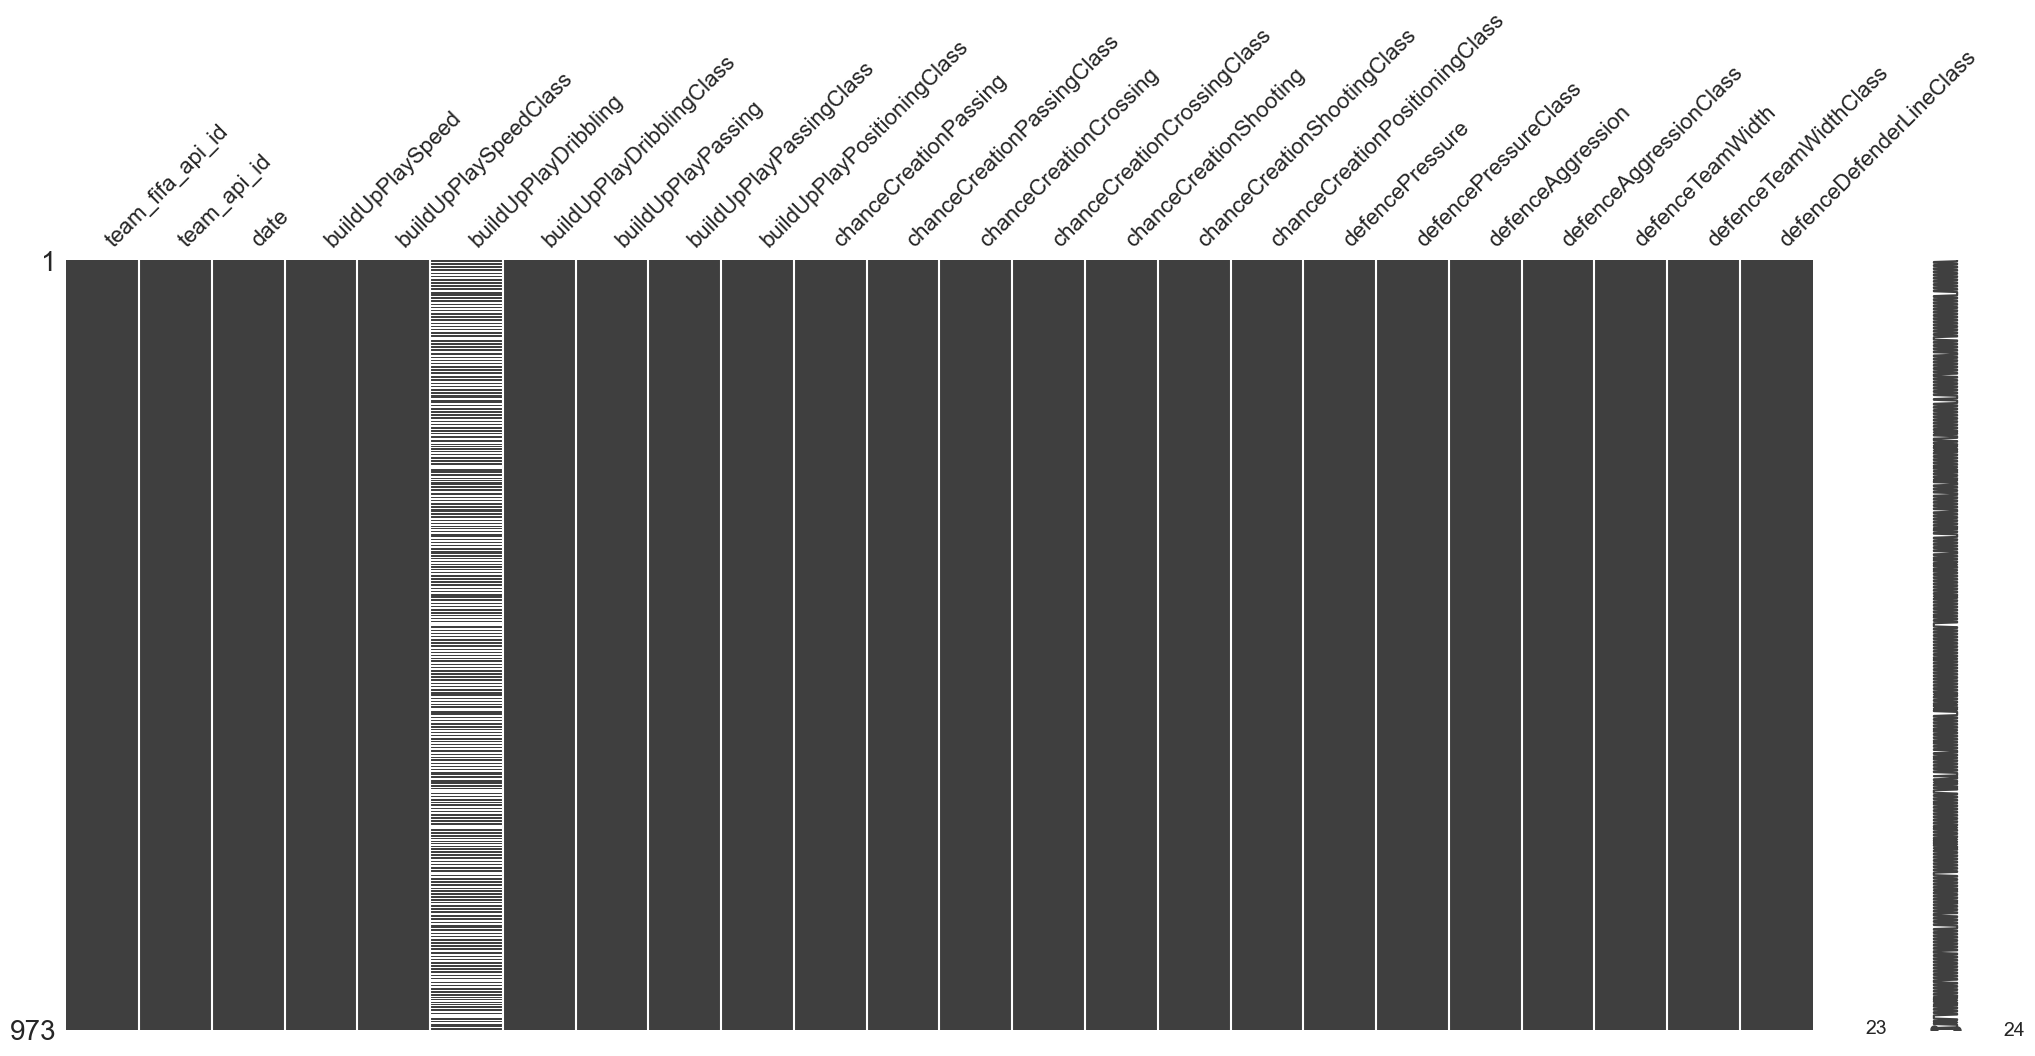

<IPython.core.display.Javascript object>

In [760]:
msno.matrix(team_attributes)

In [762]:
team_attributes.isna().sum().sort_values(ascending=False)

buildUpPlayDribbling              484
team_fifa_api_id                    0
chanceCreationCrossingClass         0
defenceTeamWidthClass               0
defenceTeamWidth                    0
defenceAggressionClass              0
defenceAggression                   0
defencePressureClass                0
defencePressure                     0
chanceCreationPositioningClass      0
chanceCreationShootingClass         0
chanceCreationShooting              0
chanceCreationCrossing              0
team_api_id                         0
chanceCreationPassingClass          0
chanceCreationPassing               0
buildUpPlayPositioningClass         0
buildUpPlayPassingClass             0
buildUpPlayPassing                  0
buildUpPlayDribblingClass           0
buildUpPlaySpeedClass               0
buildUpPlaySpeed                    0
date                                0
defenceDefenderLineClass            0
dtype: int64

<IPython.core.display.Javascript object>

There are lots of missing values only in column buildUpPlayDribbling, so we will drop this column.

In [763]:
team_attributes.drop(columns=['buildUpPlayDribbling'], inplace=True)

<IPython.core.display.Javascript object>

### 1.8.2. Duplicate values

There is one duplicate value. We have dropped it.

In [764]:
len(team_attributes) - len(team_attributes.drop_duplicates())  # count duplicate values

1

<IPython.core.display.Javascript object>

In [765]:
team_attributes[team_attributes.duplicated()]  # get duplicated rows

team_fifa_api_id team_api_id       date  buildUpPlaySpeed  \
id                                                              
861           111560        9996 2015-09-10                50   

    buildUpPlaySpeedClass buildUpPlayDribblingClass  buildUpPlayPassing  \
id                                                                        
861              Balanced                    Normal                  50   

    buildUpPlayPassingClass buildUpPlayPositioningClass  \
id                                                        
861                   Mixed                   Organised   

     chanceCreationPassing  ... chanceCreationShooting  \
id                          ...                          
861                     50  ...                     50   

     chanceCreationShootingClass chanceCreationPositioningClass  \
id                                                                
861                       Normal                      Organised   

     defencePressure defencePressureClass defenceAggression  \
id                                                            
861               45               Medium                45   

     defenceAggressionClass defenceTeamWidth  defenceTeamWidthClass  \
id                                                                    
861                   Press               50                 Normal   

    defenceDefenderLineClass  
id                            
861                    Cover  

[1 rows x 23 columns]

<IPython.core.display.Javascript object>

In [766]:
team_attributes.drop_duplicates(keep="first", inplace=True)

<IPython.core.display.Javascript object>

### 1.8.3. Handling outliers

In [767]:
num_cols_ta = team_attributes.select_dtypes(exclude=["object", "datetime64[ns]"]).columns.tolist()
ta_numeric = team_attributes[num_cols_ta]

<IPython.core.display.Javascript object>

<Axes: >

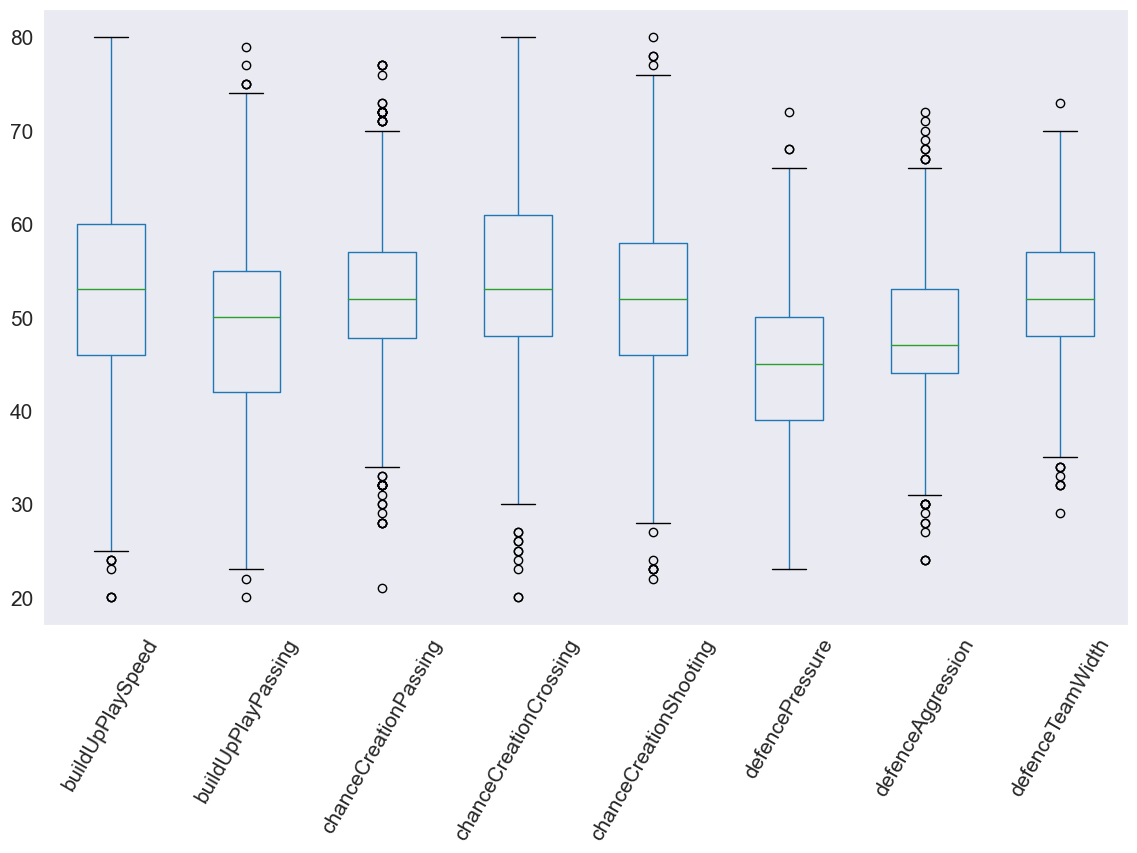

<IPython.core.display.Javascript object>

In [768]:
ta_numeric.boxplot(grid=False, rot=60, fontsize=15, figsize=(14, 8))

There are not so many outliers, and all of the values are in acceptable range, thus, we won't change or drop those outiers.

### 1.8.4. Categorical features

In [769]:
cat_cols_ta = team_attributes.select_dtypes(include=['object', 'category']).columns
ta_cat = team_attributes[cat_cols_ta]

<IPython.core.display.Javascript object>

In [770]:
for col in ta_cat:
    print(f"Unique values for {col}:")
    print(ta_cat[col].unique())
    print("-"*20)

Unique values for team_fifa_api_id:
[434 77 614 47 1901 650 245 1861 229 1530 111989 159 112513 1 2 39 448 240
 100409 57 1906 241 1848 896 32 21 675 1897 1889 234 88 3 1926 1898 160
 189 4 59 22 23 111376 1943 1896 190 378 1796 210 1842 647 1961 112409
 110364 450 78 1750 110915 5 192 231 1867 110747 1799 110502 635 242
 110569 180 181 182 467 110500 1824 468 1746 162 452 10020 7 111271 1971
 31 100626 1915 236 1903 286 894 246 110374 110636 25 111657 144 673
 110556 674 1860 110316 1888 110744 100632 110565 110832 322 165 62 28 184
 485 80 100634 100879 166 81 10029 1952 111239 44 620 110745 45 29 1832 82
 111083 100081 110724 472 1862 46 1738 1739 347 873 111091 1871 95 64 1853
 239 65 9 1844 301 2007 217 897 66 169 573 453 10 11 1893 219 68 12 69
 1747 70 1900 83 111560 1904 1891 1823 71 1910 13 72 1792 112225 171 477
 111540 682 479 100087 1892 10030 1843 73 50 1754 1914 100741 200 111086
 111087 110746 1570 1790 247 15 456 86 480 1793 449 243 457 571 203 379 74
 744 1905 1838 190

<IPython.core.display.Javascript object>

All of the categorical features seem to have acceptable values.

### 1.8.5. Distribution of values

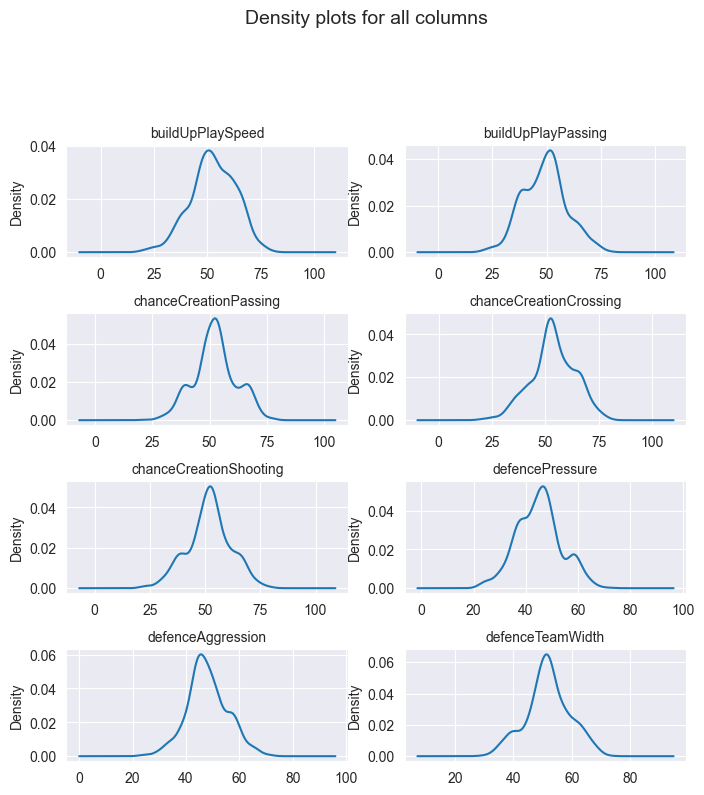

<IPython.core.display.Javascript object>

In [771]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5) 

for col, ax in zip(ta_numeric.columns, axes.flatten()):
    ta_numeric[col].plot(kind="density", ax=ax)
    ax.set_title(
        col, fontsize=10
    )  
    ax.set_xlabel("")  

fig.suptitle("Density plots for all columns", fontsize=14, y=1.05)

plt.show()

We can observe different types of distributions across columns. Some of the features have similar distributions, they could be correlated with each other and with some other features in the dataset. We will explore this further.

Now, let's see the countplots for categorical values:

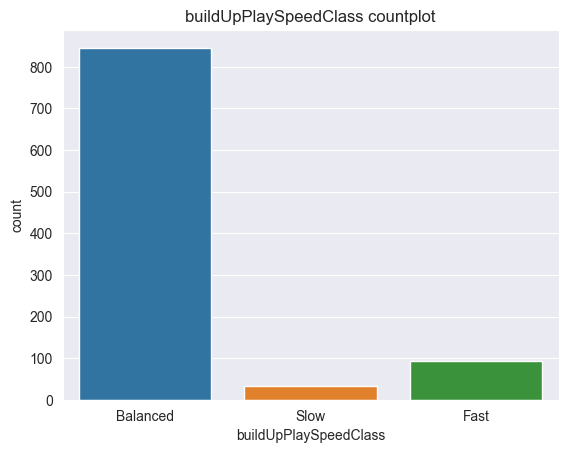

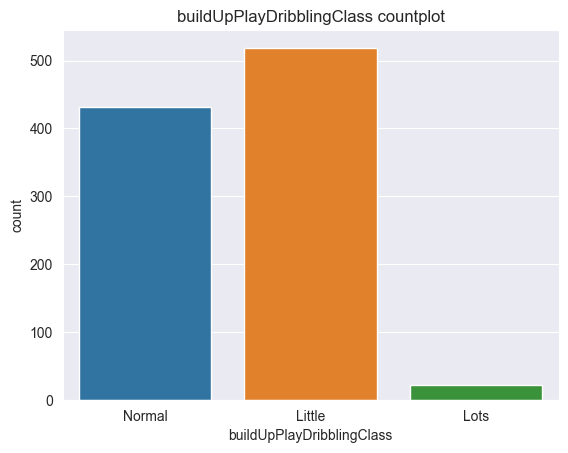

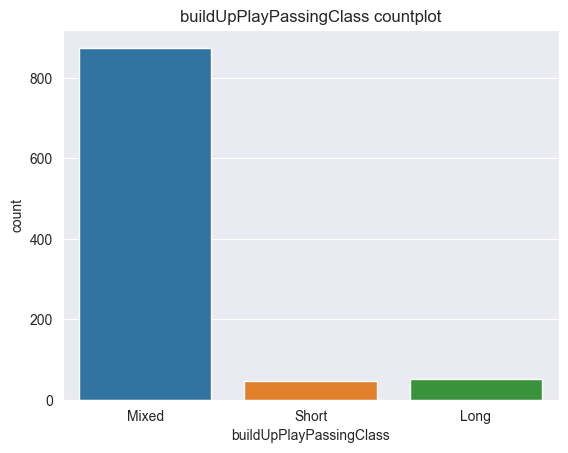

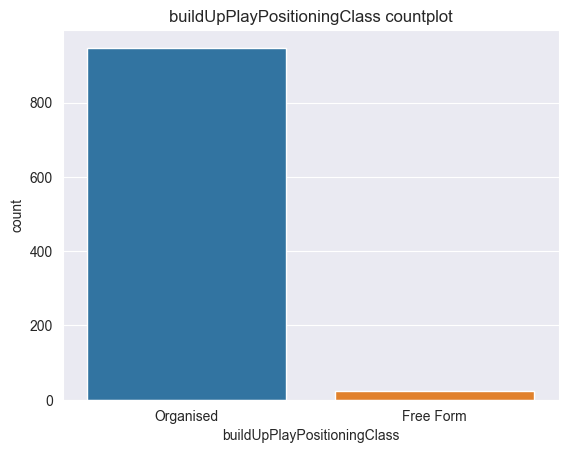

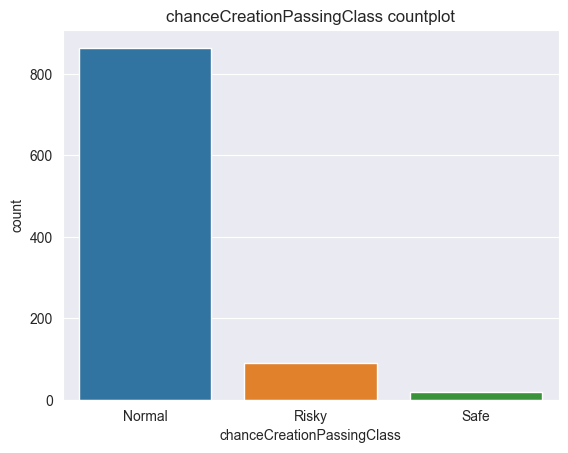

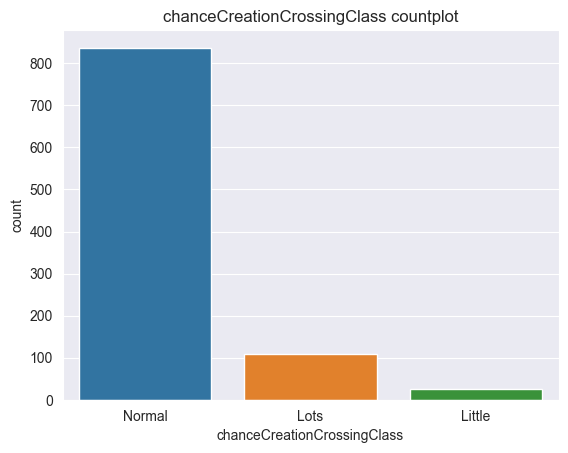

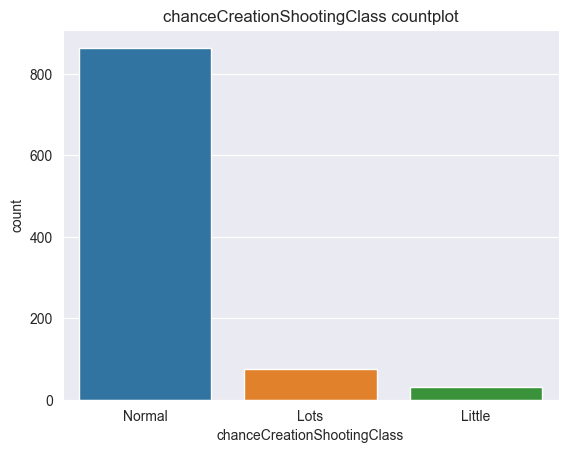

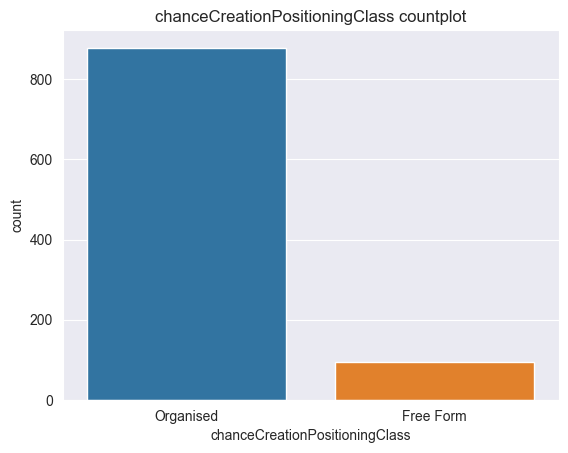

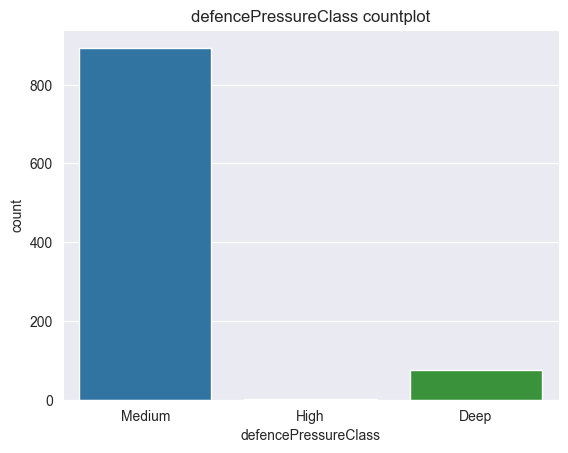

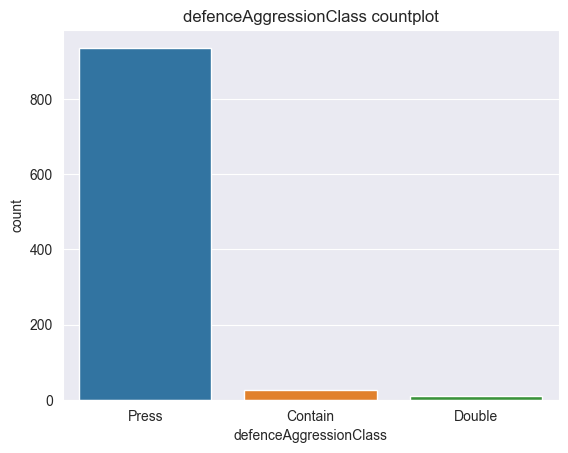

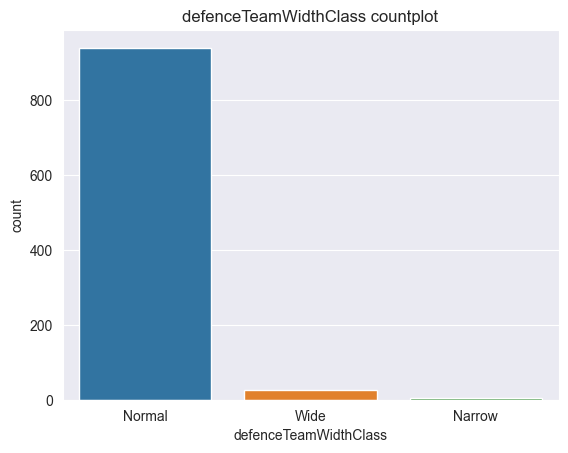

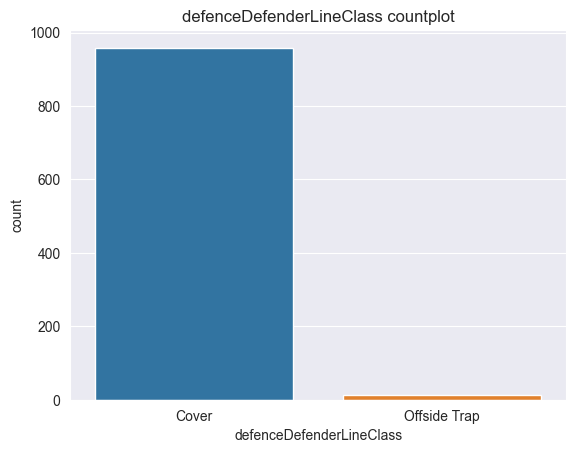

<IPython.core.display.Javascript object>

In [772]:
for col in ta_cat.iloc[:, 2:]:
    sns.countplot(
    x=ta_cat[col]
    )
    plt.title(f"{col} countplot")
    plt.show()

Based on these count plots, we can tell that most teams have:
- Balanced build-up play speed class;
- Little build-up play dribbling class;
- Mixed build-up play passing class;
- Organised build-up play positioning class and chance creation positioning class;
- Normal chance creation passing/crossing/shooting classes;
- Medium defense pressure class;
- Press defense aggression class;
- Normal defense team width class;
- Cover defense/defender line class.

### 1.8.6. Correlations

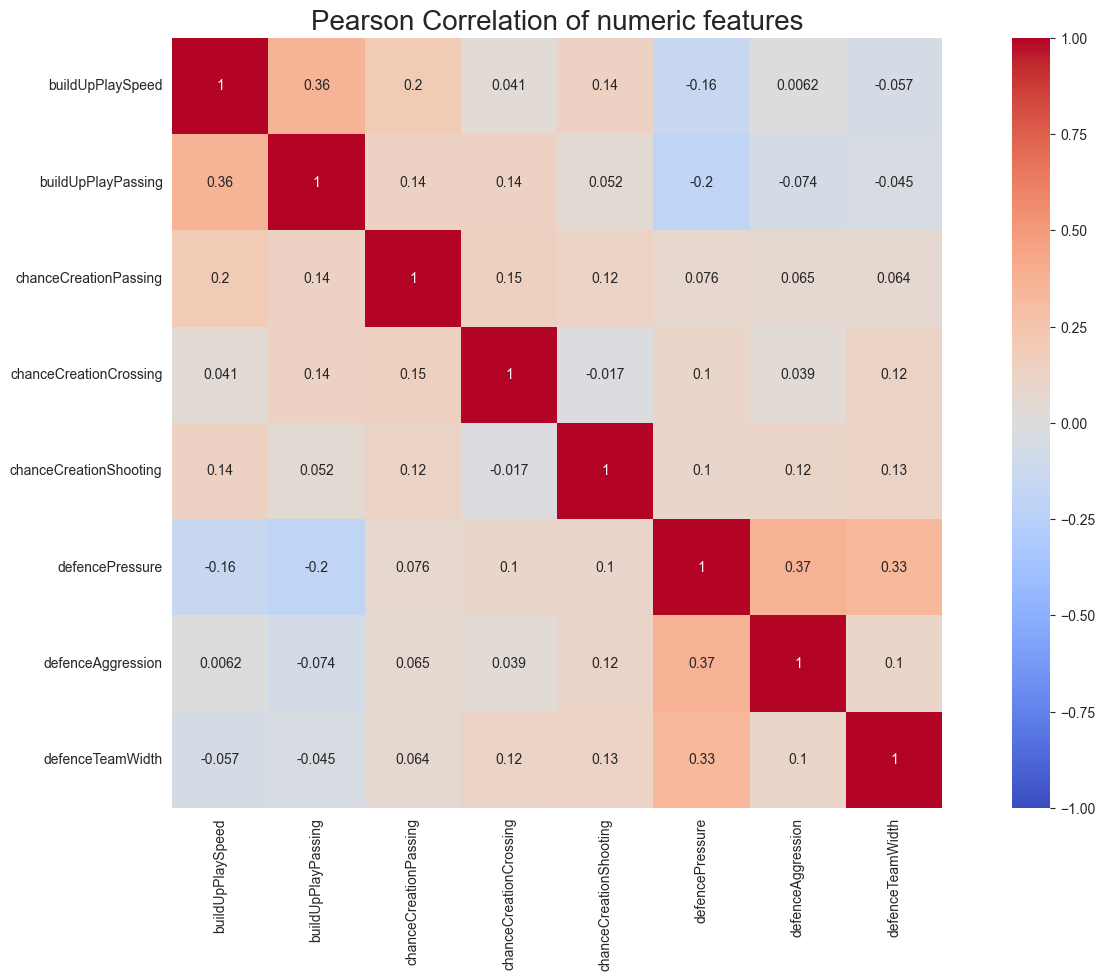

<IPython.core.display.Javascript object>

In [773]:
# Plot correlations with annotations
plt.figure(figsize=(18, 10))
plt.title("Pearson Correlation of numeric features", fontsize=20)
ax = sns.heatmap(team_attributes.corr(numeric_only=True, method='spearman'), cmap="coolwarm", 
                 vmin=-1, vmax=1, square=True, annot=True)

Text(0.5, 1.02, 'Scatterplot Matrix for the Team_Attributes table')

<Figure size 600x400 with 0 Axes>

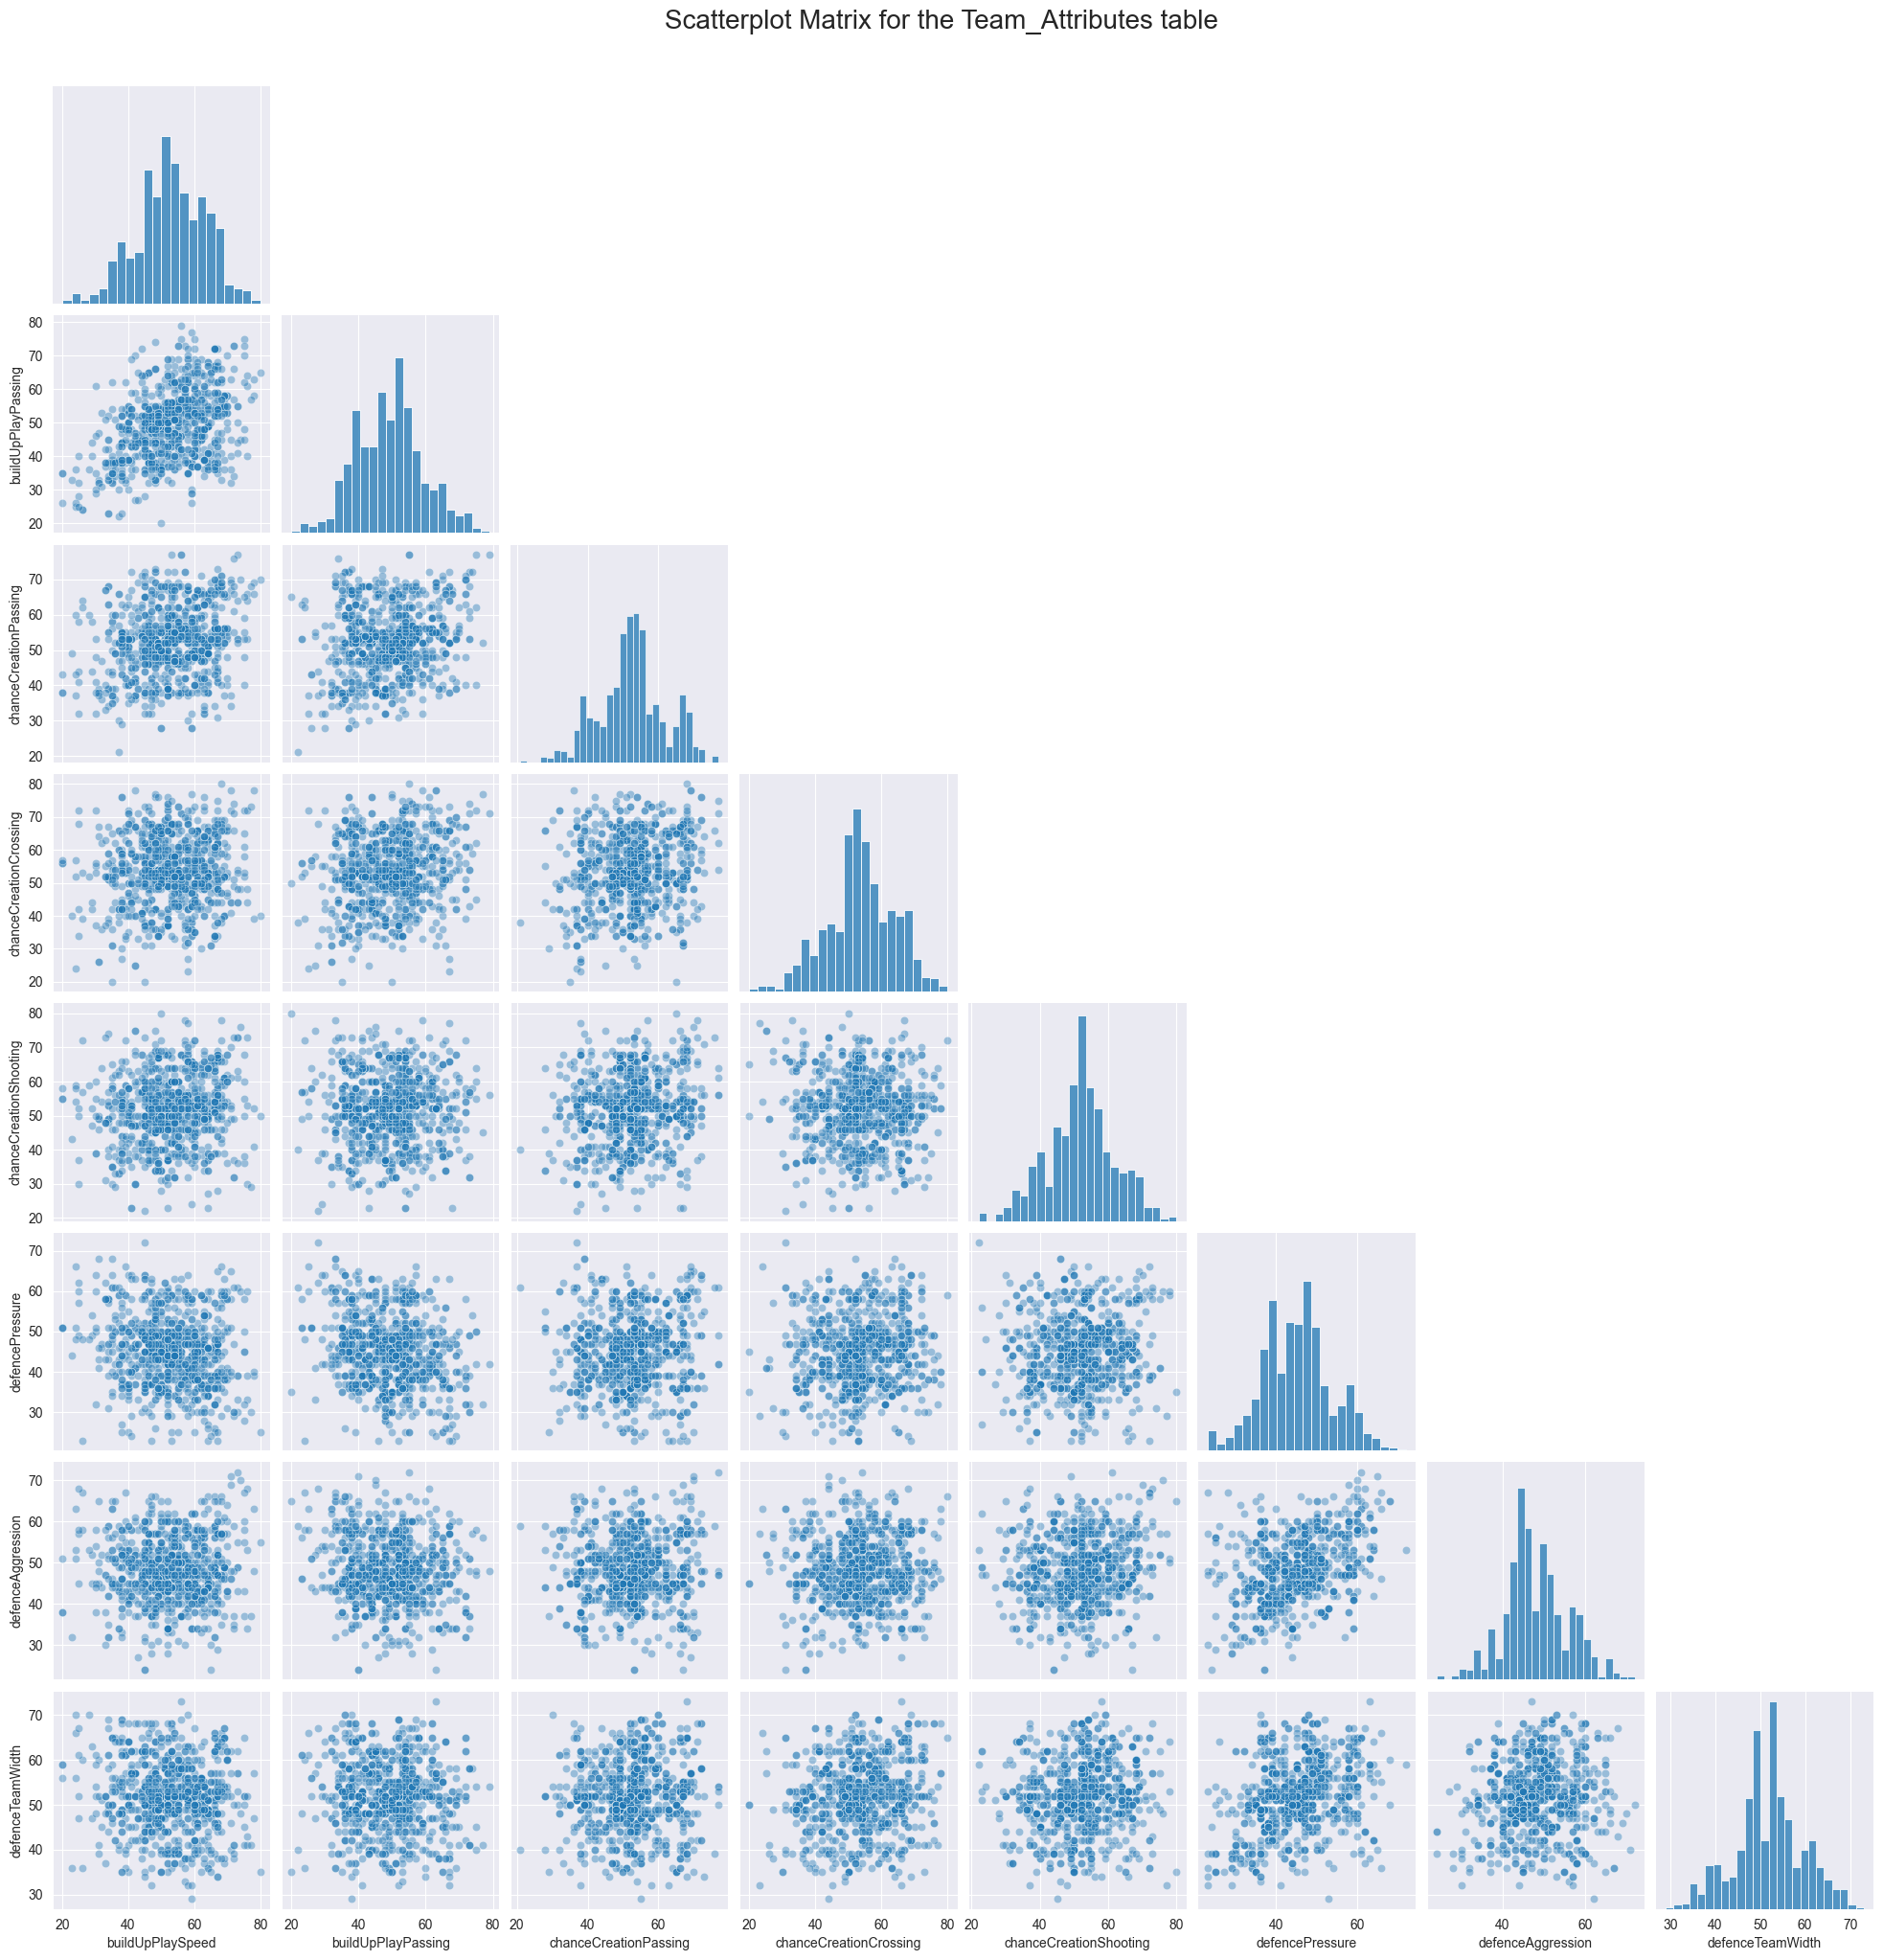

<IPython.core.display.Javascript object>

In [774]:
plt.figure(figsize=(6, 4))
pair_plot = sns.pairplot(
    ta_numeric, corner=True, plot_kws={"alpha": 0.4}
)
plt.text(
    0.5,
    1.02,
    "Scatterplot Matrix for the Team_Attributes table",
    transform=pair_plot.fig.transFigure,
    ha="center",
    va="center",
    fontsize=20,
)

The features in this table seem to not be very correlated with each other.

# 2. Creation of pre-processed joined tables

Based on the initial analysis, we will create new SQL tables which will be used in our further analysis.

We have added three new tables to the existing sqlite database:
- player_info
- team_info
- match_info

For easier analysis, we will group team and player attributes by football seasons.

In [1057]:
def convert_date_to_season (row):
    date = pd.to_datetime(row['date'])
    
    if pd.Timestamp('2011-07-29') <= date <= pd.Timestamp('2012-05-20'):
        return '2011/2012'
    elif pd.Timestamp('2012-07-28') <= date <= pd.Timestamp('2013-06-01'):
        return '2012/2013'
    elif pd.Timestamp('2013-08-02') <= date <= pd.Timestamp('2014-05-18'):
        return '2013/2014'
    elif pd.Timestamp('2014-07-25') <= date <= pd.Timestamp('2015-05-31'):
        return '2014/2015'
    elif pd.Timestamp('2015-07-24') <= date <= pd.Timestamp('2016-05-17'):
        return '2015/2016'
    else:
        return None

<IPython.core.display.Javascript object>

## Table 1: Player info 

In [1058]:
player_attributes_reduced['season'] = player_attributes_reduced.apply(convert_date_to_season, axis=1)

<IPython.core.display.Javascript object>

In [1059]:
player_info = pd.merge(player_upd, player_attributes_reduced, on='player_api_id', how='inner')

<IPython.core.display.Javascript object>

In [1060]:
player_info.rename(columns={'year': 'player_birth_year'}, inplace=True)
player_info.drop(columns=['player_fifa_api_id_x', 'player_fifa_api_id_y'], inplace=True)
player_info = round(player_info, 2)

<IPython.core.display.Javascript object>

In [1061]:
numeric_cols = player_info.select_dtypes('number').columns
categorical_cols = player_info.select_dtypes('object', 'datetime64').columns

player_info_by_season = player_info.groupby(['season', 'player_api_id']).agg({
    **dict.fromkeys(numeric_cols, 'mean'), 
    **dict.fromkeys(categorical_cols, lambda x: x.mode()[0]) 
}).drop(columns=['season', 'player_api_id']).reset_index()

<IPython.core.display.Javascript object>

In [1062]:
player_info_by_season.head()

season  player_api_id  height  player_birth_year  weight_kg    bmi  \
0  2011/2012           2625  175.26             1981.0      69.85  22.74   
1  2011/2012           2752  187.96             1982.0      78.93  22.34   
2  2011/2012           2768  180.34             1982.0      69.85  21.48   
3  2011/2012           2770  180.34             1982.0      73.03  22.46   
4  2011/2012           2796  182.88             1987.0      77.11  23.06   

   overall_rating  heading_accuracy  sprint_speed  balance  ...  strength  \
0            58.0              46.0          63.0     75.5  ...      55.0   
1            68.5              70.0          34.0     42.0  ...      80.0   
2            72.0              69.0          59.5     59.0  ...      67.0   
3            71.0              71.0          52.5     62.0  ...      57.0   
4            62.0              16.0          52.0     64.0  ...      59.0   

   gk_diving  passing  shooting  defending  goalkeeping       player_name  \
0       12.0    55.00     57.67      59.33         8.25    Patryk Rachwal   
1       11.0    45.25     37.00      69.33         9.25       Diego Mainz   
2       11.0    54.50     32.33      76.50        12.00       Jose Dorado   
3       12.0    72.25     73.17      35.50        12.00  Ignacio Gonzalez   
4       70.0    14.00     19.00      13.33        60.25    Javier Jimenez   

   preferred_foot attacking_work_rate defensive_work_rate  
0           right                high              medium  
1           right              medium              medium  
2            left              medium              medium  
3            left              medium                 low  
4           right              medium              medium  

[5 rows x 22 columns]

<IPython.core.display.Javascript object>

In [1063]:
player_info_by_season.to_sql('player_info', conn, if_exists='replace', index=False)

35135

<IPython.core.display.Javascript object>

## Table 2: Team info

In [1066]:
team_attributes['season'] = team_attributes.apply(convert_date_to_season, axis=1)

<IPython.core.display.Javascript object>

In [1067]:
team_info = pd.merge(team, team_attributes, on='team_api_id', how='inner')

<IPython.core.display.Javascript object>

In [1068]:
team_info.drop(columns=['team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
team_info = round(team_info, 2)

<IPython.core.display.Javascript object>

In [1070]:
numeric_cols = team_info.select_dtypes('number').columns
categorical_cols = team_info.select_dtypes('object', 'datetime64').columns

team_info_by_season = team_info.groupby(['season', 'team_api_id']).agg({
    **dict.fromkeys(numeric_cols, 'mean'), 
    **dict.fromkeys(categorical_cols, lambda x: x.mode()) 
}).drop(columns=['season', 'team_api_id']).reset_index()

<IPython.core.display.Javascript object>

In [1078]:
team_info_by_season.team_long_name

0               Ruch Chorzów
1        Oud-Heverlee Leuven
2      Jagiellonia Białystok
3             S.C. Olhanense
4                Lech Poznań
               ...          
967          Real Valladolid
968         AC Arles-Avignon
969                FC Arouca
970                    Carpi
971     Royal Excel Mouscron
Name: team_long_name, Length: 972, dtype: object

<IPython.core.display.Javascript object>

In [1075]:
team_info_by_season.to_sql('team_info', conn, if_exists='replace', index=False)

972

<IPython.core.display.Javascript object>

## Table 3: Match info

In [893]:
country.index = country.index.rename('country_id')
country = country.rename(columns={'name': 'country_name'})
league.index = league.index.rename('league_id')
league = league.rename(columns={'name': 'league_name'})

<IPython.core.display.Javascript object>

In [905]:
league_country = pd.merge(league, country, on=['country_id'], how='left')
match_info = pd.merge(match_reduced, league_country, on=['country_id'], how='inner')

<IPython.core.display.Javascript object>

In [906]:
match_info.head()

country_id league_id     season stage       date match_api_id  \
0          1         1  2011/2012     1 2011-07-29      1032692   
1          1         1  2011/2012     1 2011-07-30      1032693   
2          1         1  2011/2012     1 2011-07-30      1032694   
3          1         1  2011/2012     1 2011-07-30      1032697   
4          1         1  2011/2012     1 2011-07-30      1032698   

  home_team_api_id away_team_api_id  home_team_goal  away_team_goal  ...  \
0             1773             8635               2               1  ...   
1             9998             9985               1               1  ...   
2             9987             9993               3               1  ...   
3             8571             9989               1               1  ...   
4             8203             9997               2               1  ...   

  away_player_7 away_player_8 away_player_9 away_player_10 away_player_11  \
0      114333.0      178249.0      265123.0        46552.0       181276.0   
1       17276.0      119117.0       38382.0       248689.0        46335.0   
2      163613.0       38371.0       33622.0       166679.0        14487.0   
3      192323.0       32760.0      181073.0        27423.0        33098.0   
4       37972.0       37866.0       68120.0       104415.0        68226.0   

  H_bet_prob D_bet_prob A_bet_prob             league_name country_name  
0   0.165000   0.260000   0.670000  Belgium Jupiler League      Belgium  
1   0.221667   0.290000   0.586667  Belgium Jupiler League      Belgium  
2   0.690000   0.245000   0.158333  Belgium Jupiler League      Belgium  
3   0.568333   0.290000   0.241667  Belgium Jupiler League      Belgium  
4   0.603333   0.281667   0.213333  Belgium Jupiler League      Belgium  

[5 rows x 37 columns]

<IPython.core.display.Javascript object>

In [911]:
match_info.to_sql('match_info', conn, if_exists='replace', index=False)

13068

<IPython.core.display.Javascript object>